In [92]:
from pathlib import Path
import ast
import numpy as np
import pandas as pd
import glob
from tqdm import tqdm
from types import SimpleNamespace
from utils import get_current_dir

args = SimpleNamespace(
    inputpath=get_current_dir().parent / "data" / "results" / "result.csv",
)

df = pd.read_csv(args.inputpath)
df = df.drop(columns=["author_name", "author_gender", "author_monthly_toxicity", "partner_monthly_toxicity"]) # not interesting

print(df.columns)
print(df.dtypes)
df

Index(['conversation_language', 'partner_name', 'author_monthly_sentiments',
       'partner_monthly_sentiments', 'partner_gender', 'topic_diversity',
       'total_messages', 'author_message_ratio', 'partner_message_ratio',
       'author_avg_word_count', 'partner_avg_word_count', 'author_media_count',
       'partner_media_count', 'author_emoji_count', 'partner_emoji_count',
       'author_url_count', 'partner_url_count', 'author_vocabulary_size',
       'partner_vocabulary_size', 'total_conversations', 'total_duration_days',
       'author_message_freq_s', 'partner_message_freq_s',
       'author_response_time_s', 'partner_response_time_s',
       'author_avg_active_time', 'partner_avg_active',
       'author_conversation_initiations', 'partner_conversation_initiations',
       'embeddings'],
      dtype='object')
conversation_language                object
partner_name                         object
author_monthly_sentiments            object
partner_monthly_sentiments           ob

,conversation_language,partner_name,author_monthly_sentiments,partner_monthly_sentiments,partner_gender,topic_diversity,total_messages,author_message_ratio,partner_message_ratio,author_avg_word_count,...,total_duration_days,author_message_freq_s,partner_message_freq_s,author_response_time_s,partner_response_time_s,author_avg_active_time,partner_avg_active,author_conversation_initiations,partner_conversation_initiations,embeddings
0,de,Linus Pirker,"[0.5495279729366302, 0.5618547734618187, 0.597...","[0.5254330635070801, 0.5782329735159873, 0.576...",m,0.090025,7109,0.652131,0.347869,6.436799,...,368,6859.546925,12827.208737,342.725528,316.715177,11.300475,11.892034,206,206,"[-0.03347809985280037, -0.1450592577457428, 0...."
1,en,Meryem,[0.583810047507286],[0.5411690598726273],f,0.029873,1545,0.535922,0.464078,5.541063,...,10,1012.817412,1166.731843,150.947368,106.929134,15.672705,15.217573,5,5,"[-0.13334061205387115, -0.030392566695809364, ..."
2,de,Lukas TU,[0.5484319677719703],[0.525968898315819],m,0.096774,120,0.591667,0.408333,3.985915,...,23,28321.714285,32106.250000,73.714286,46.875000,12.408451,12.673469,2,2,"[0.059835225343704224, -0.029074233025312424, ..."
3,de,Francisca Rhomberg,"[0.6061742099431845, 0.5473003796856812, 0.546...","[0.5930783847967783, 0.5963006935902496, 0.594...",f,0.082734,337,0.620178,0.379822,6.052632,...,45,18350.769230,29941.889763,621.428571,624.285714,16.153110,16.195312,20,20,"[0.09360271692276001, 0.1564306914806366, 0.16..."
4,de,Patrick Styll,"[0.5499562174081802, 0, 0, 0, 0.54667769869168...","[0.6967008709907532, 0, 0, 0, 0.57693000435829...",m,0.090426,206,0.703883,0.296117,8.427586,...,198,118791.666666,285094.000000,848.108108,1037.142857,15.882759,15.459016,13,13,"[0.10958530753850937, 0.12278810888528824, 0.2..."
5,de,Raffi Kattner,"[0.5750297450500986, 0.5547596621513367, 0.567...","[0.5326609754044077, 0.5573200950026512, 0.552...",m,0.089924,4267,0.546989,0.453011,4.910454,...,225,8299.468495,10019.596273,600.413793,441.722320,13.504284,14.228143,127,127,"[0.18272364139556885, 0.03686937317252159, 0.2..."
6,de,Sophie Kellerberger,[0.5828090079806068],[0.5674613614877065],f,0.133333,35,0.628571,0.371429,6.272727,...,26,103142.857142,180490.000000,73.333333,450.000000,16.227273,16.846154,1,1,"[-0.03610513359308243, -0.1983744502067566, 0...."
7,de,* Laura Chaudoire,"[0.5931250670552254, 0.5532143822312355, 0.565...","[0.5586958476901054, 0.5951130899786949, 0.580...",f,0.070835,99999,0.591256,0.408744,5.015645,...,301,438.460523,634.243143,205.936873,209.778463,13.835653,14.598767,350,350,"[-0.07086506485939026, 0.07520487159490585, 0...."
8,de,Max Seeliger,[0.501287134985129],[0.8145162888935634],m,0.117647,27,0.740741,0.259259,4.300000,...,1,31.578947,120.000000,45.000000,30.000000,23.000000,23.000000,0,0,"[0.11342271417379379, 0.10983209311962128, 0.0..."
9,de,Nicole Chaudoire,"[0.9810206294059753, 0.8146860748529434, 0.869...","[0.9759458899497986, 0.7020385464032491, 0.902...",f,0.114286,57,0.403509,0.596491,14.086957,...,229,897703.636363,598270.909090,1290.000000,1820.000000,13.260870,13.088235,12,12,"[0.015850134193897247, 0.14513789117336273, 0...."


In [93]:
print(df.columns)
print(df.dtypes)
print(df.head())

Index(['conversation_language', 'partner_name', 'author_monthly_sentiments',
       'partner_monthly_sentiments', 'partner_gender', 'topic_diversity',
       'total_messages', 'author_message_ratio', 'partner_message_ratio',
       'author_avg_word_count', 'partner_avg_word_count', 'author_media_count',
       'partner_media_count', 'author_emoji_count', 'partner_emoji_count',
       'author_url_count', 'partner_url_count', 'author_vocabulary_size',
       'partner_vocabulary_size', 'total_conversations', 'total_duration_days',
       'author_message_freq_s', 'partner_message_freq_s',
       'author_response_time_s', 'partner_response_time_s',
       'author_avg_active_time', 'partner_avg_active',
       'author_conversation_initiations', 'partner_conversation_initiations',
       'embeddings'],
      dtype='object')
conversation_language                object
partner_name                         object
author_monthly_sentiments            object
partner_monthly_sentiments           ob

# P9

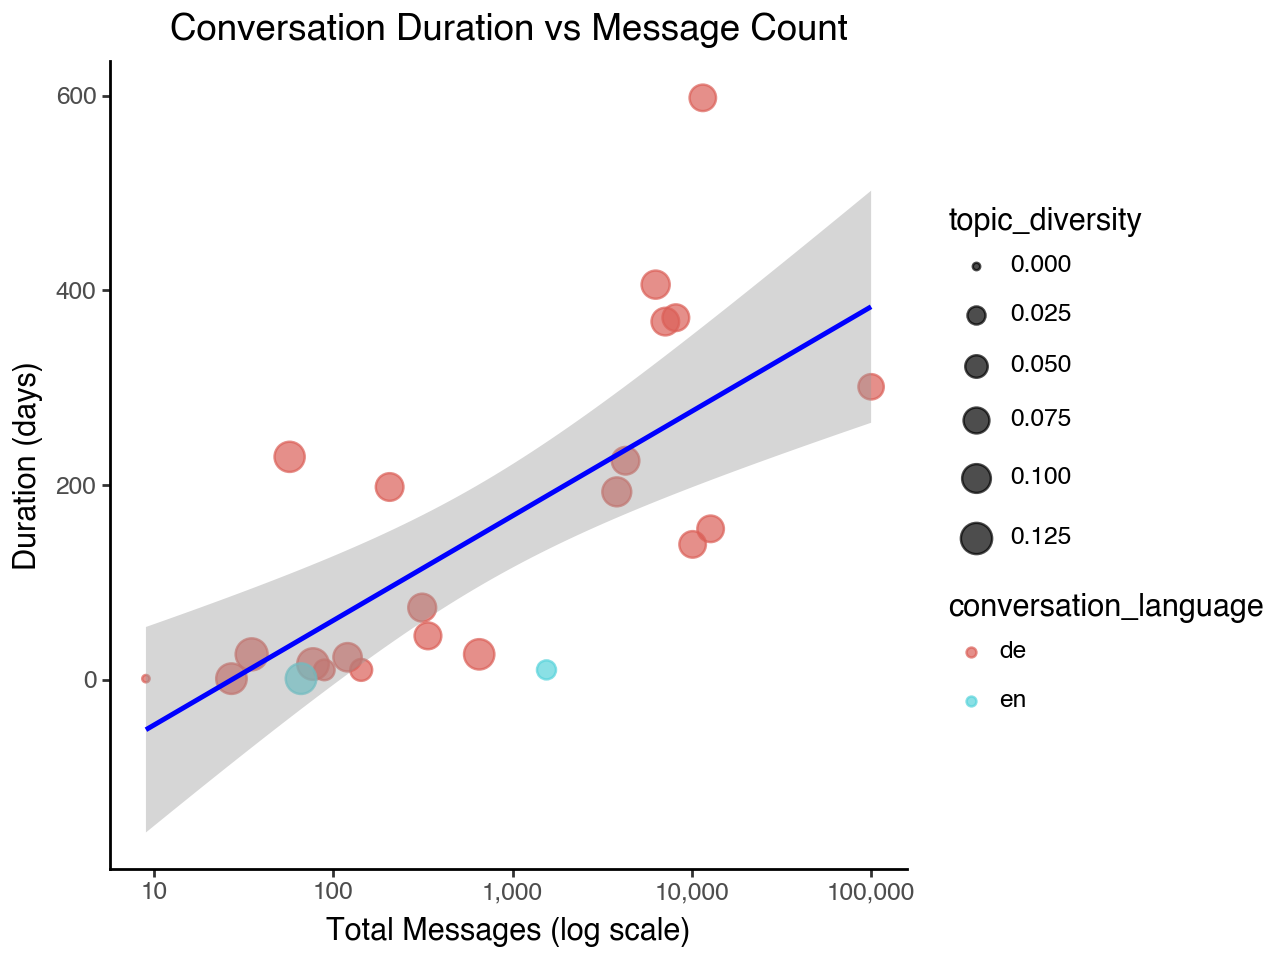

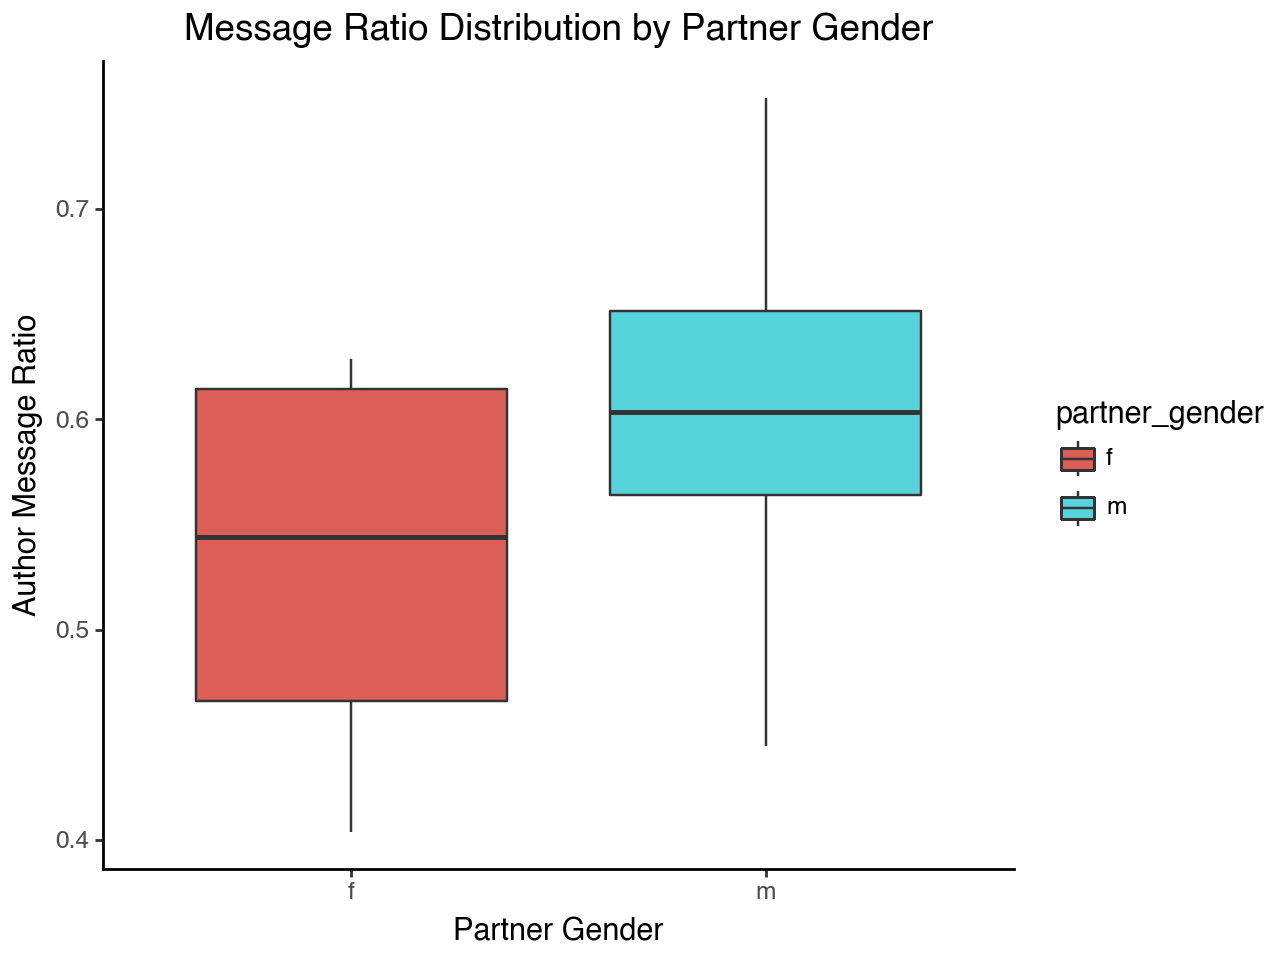

/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


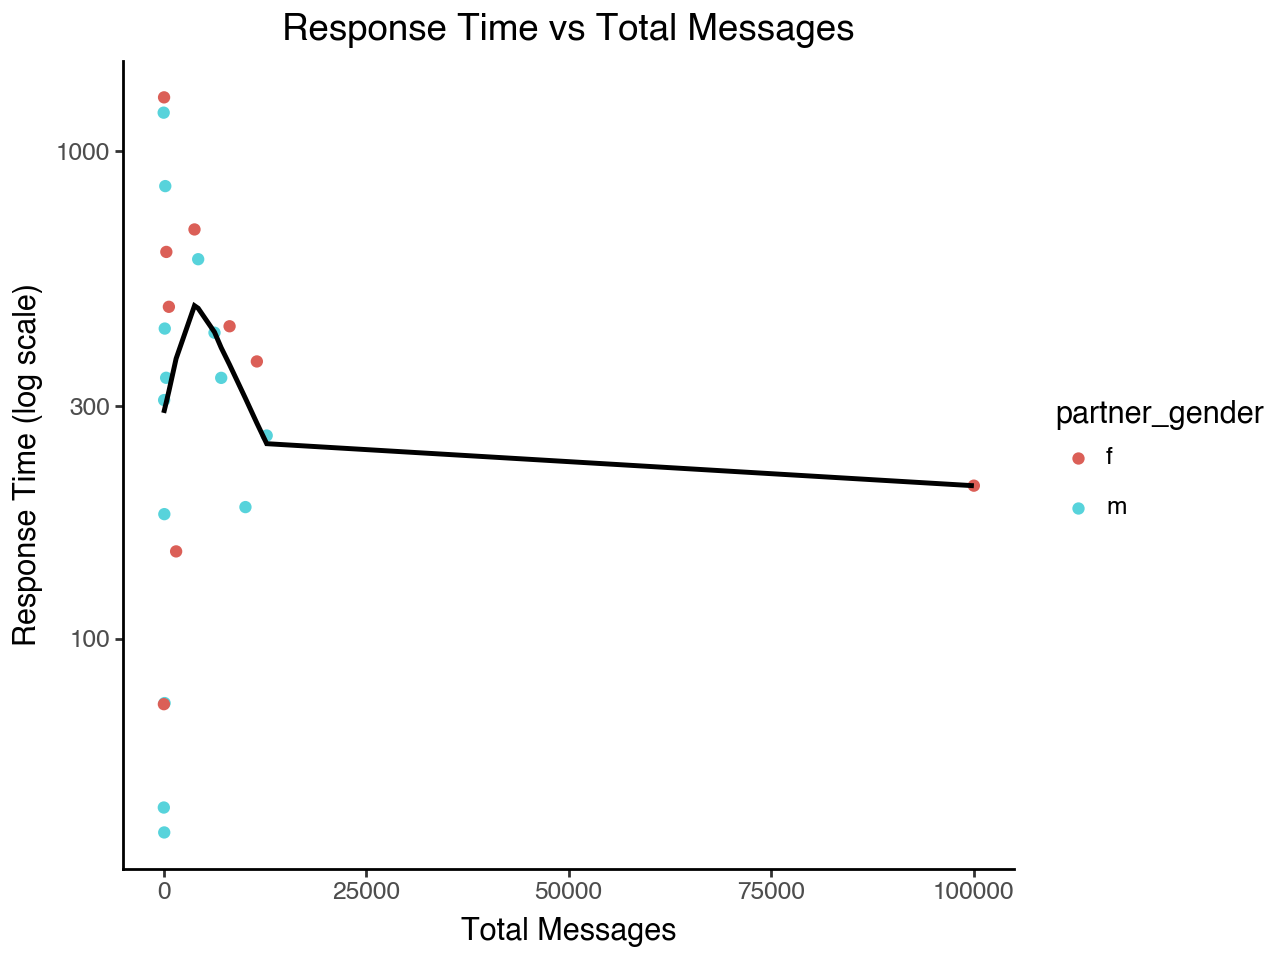

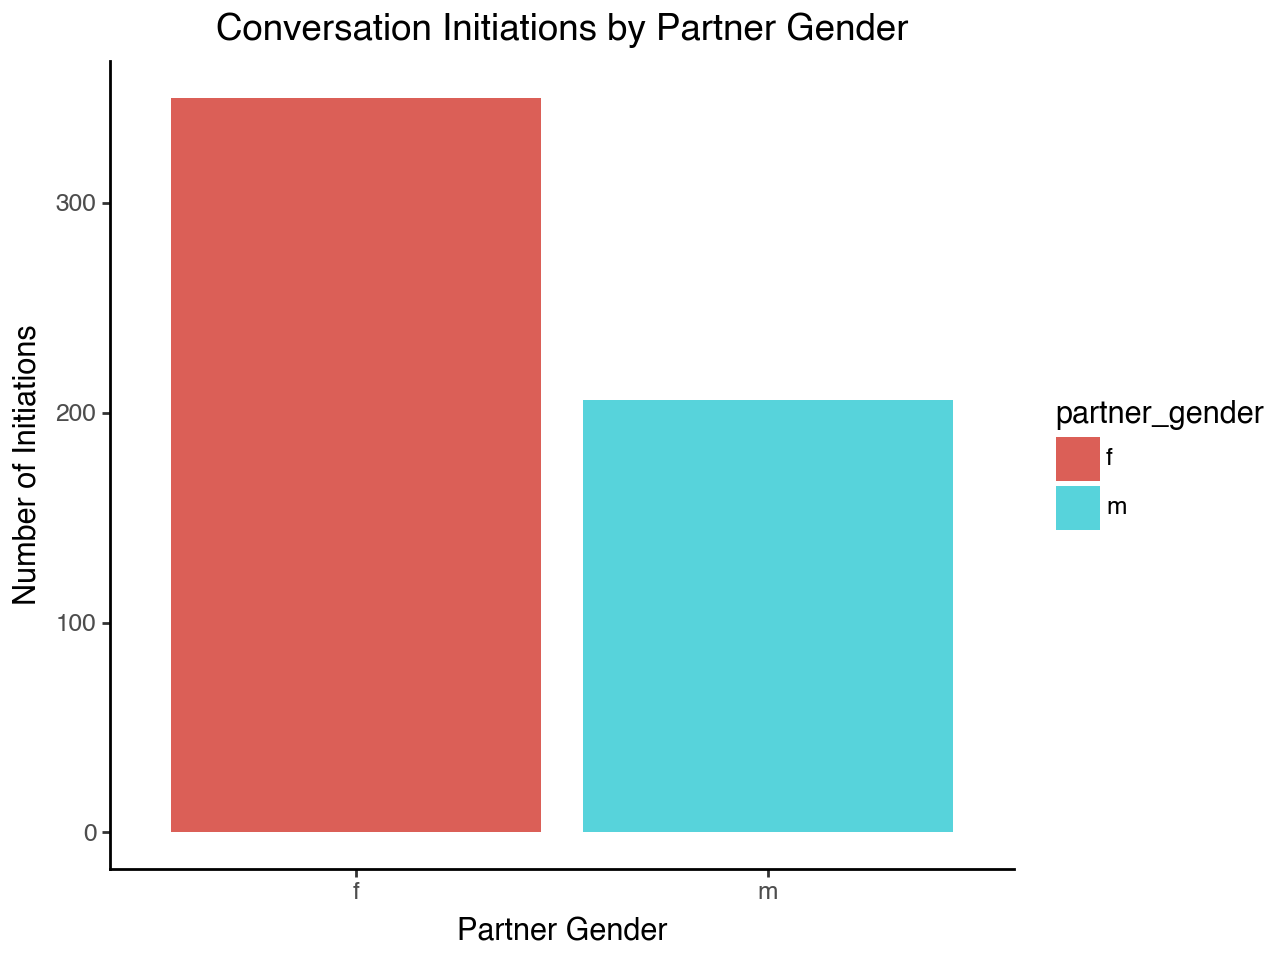

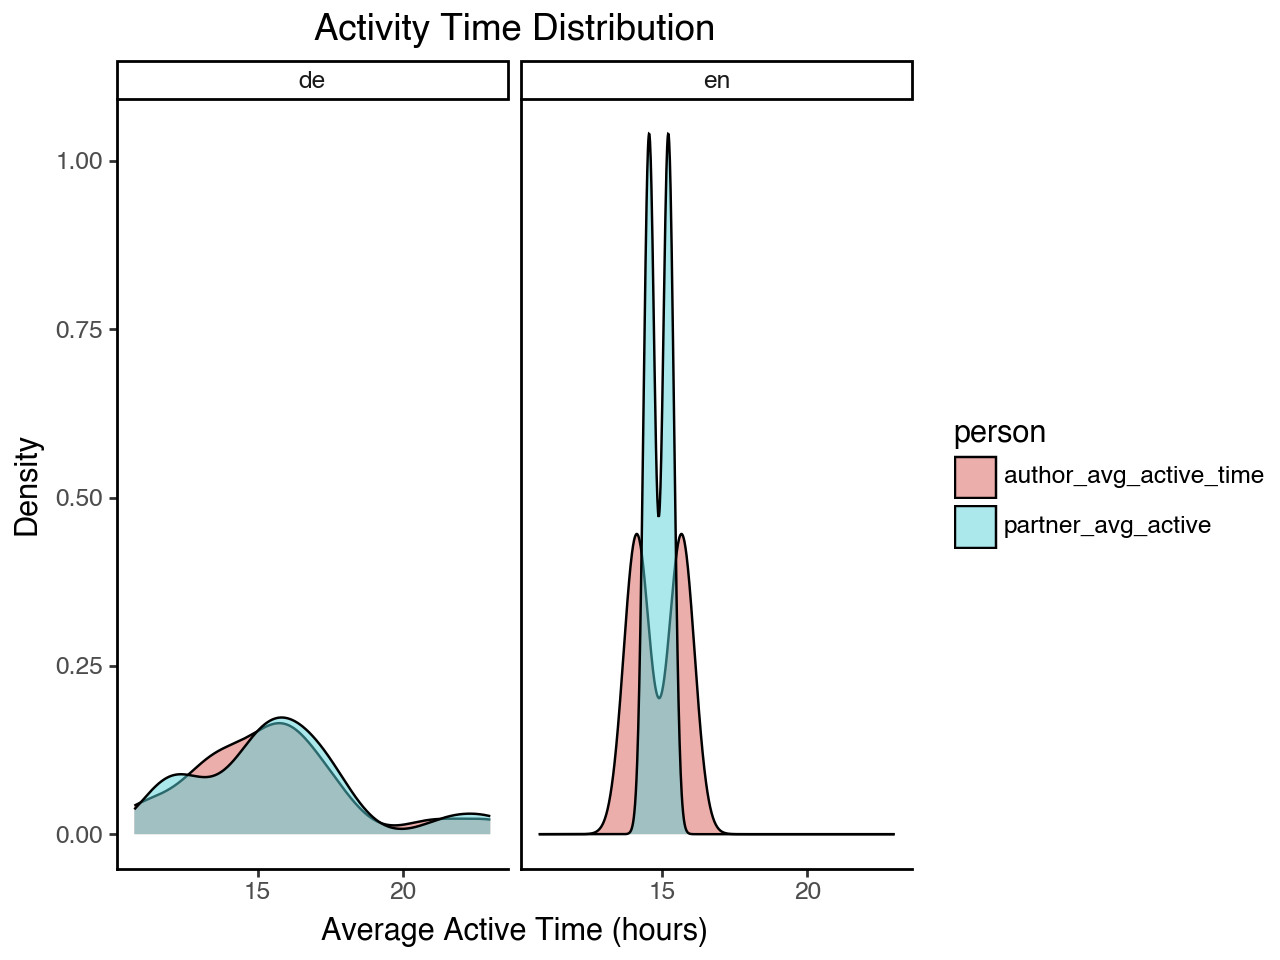

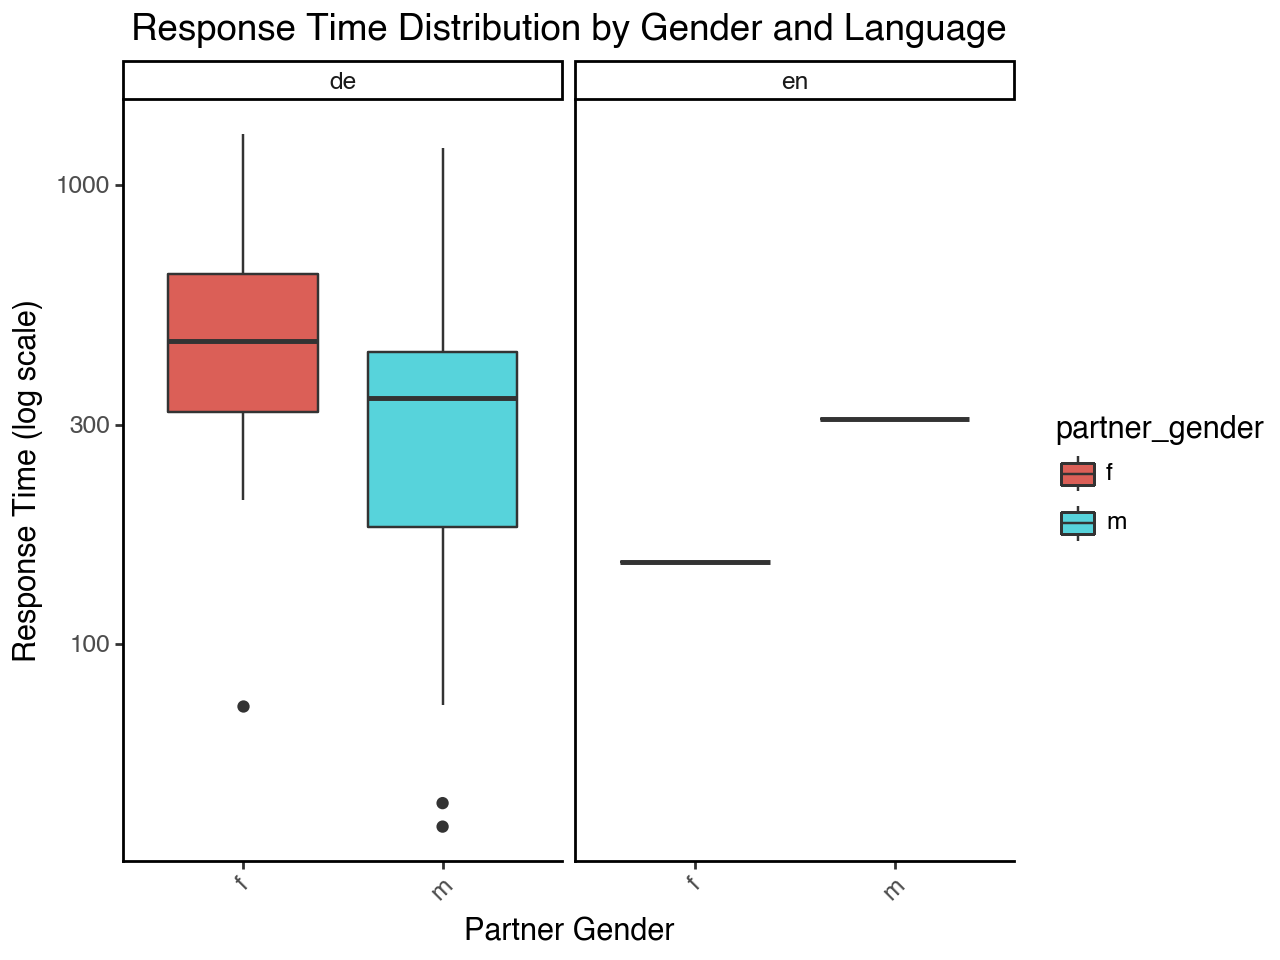

/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_density.py:182: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_density.py:187: PlotnineWarning: Groups with fewer than 2 data points have been removed.
/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_density.py:182: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_density.py:187: PlotnineWarning: Groups with fewer than 2 data points have been removed.


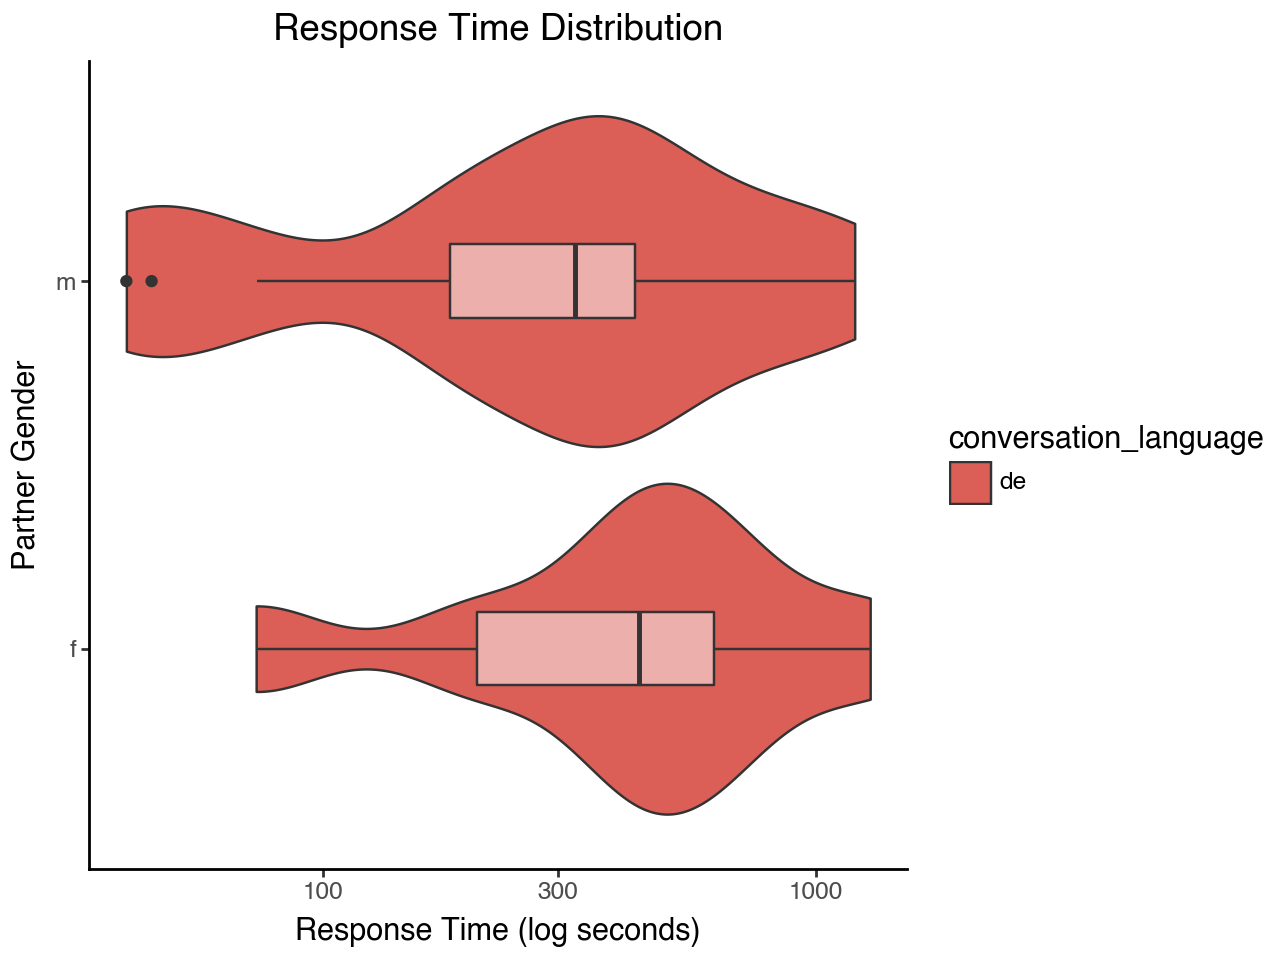

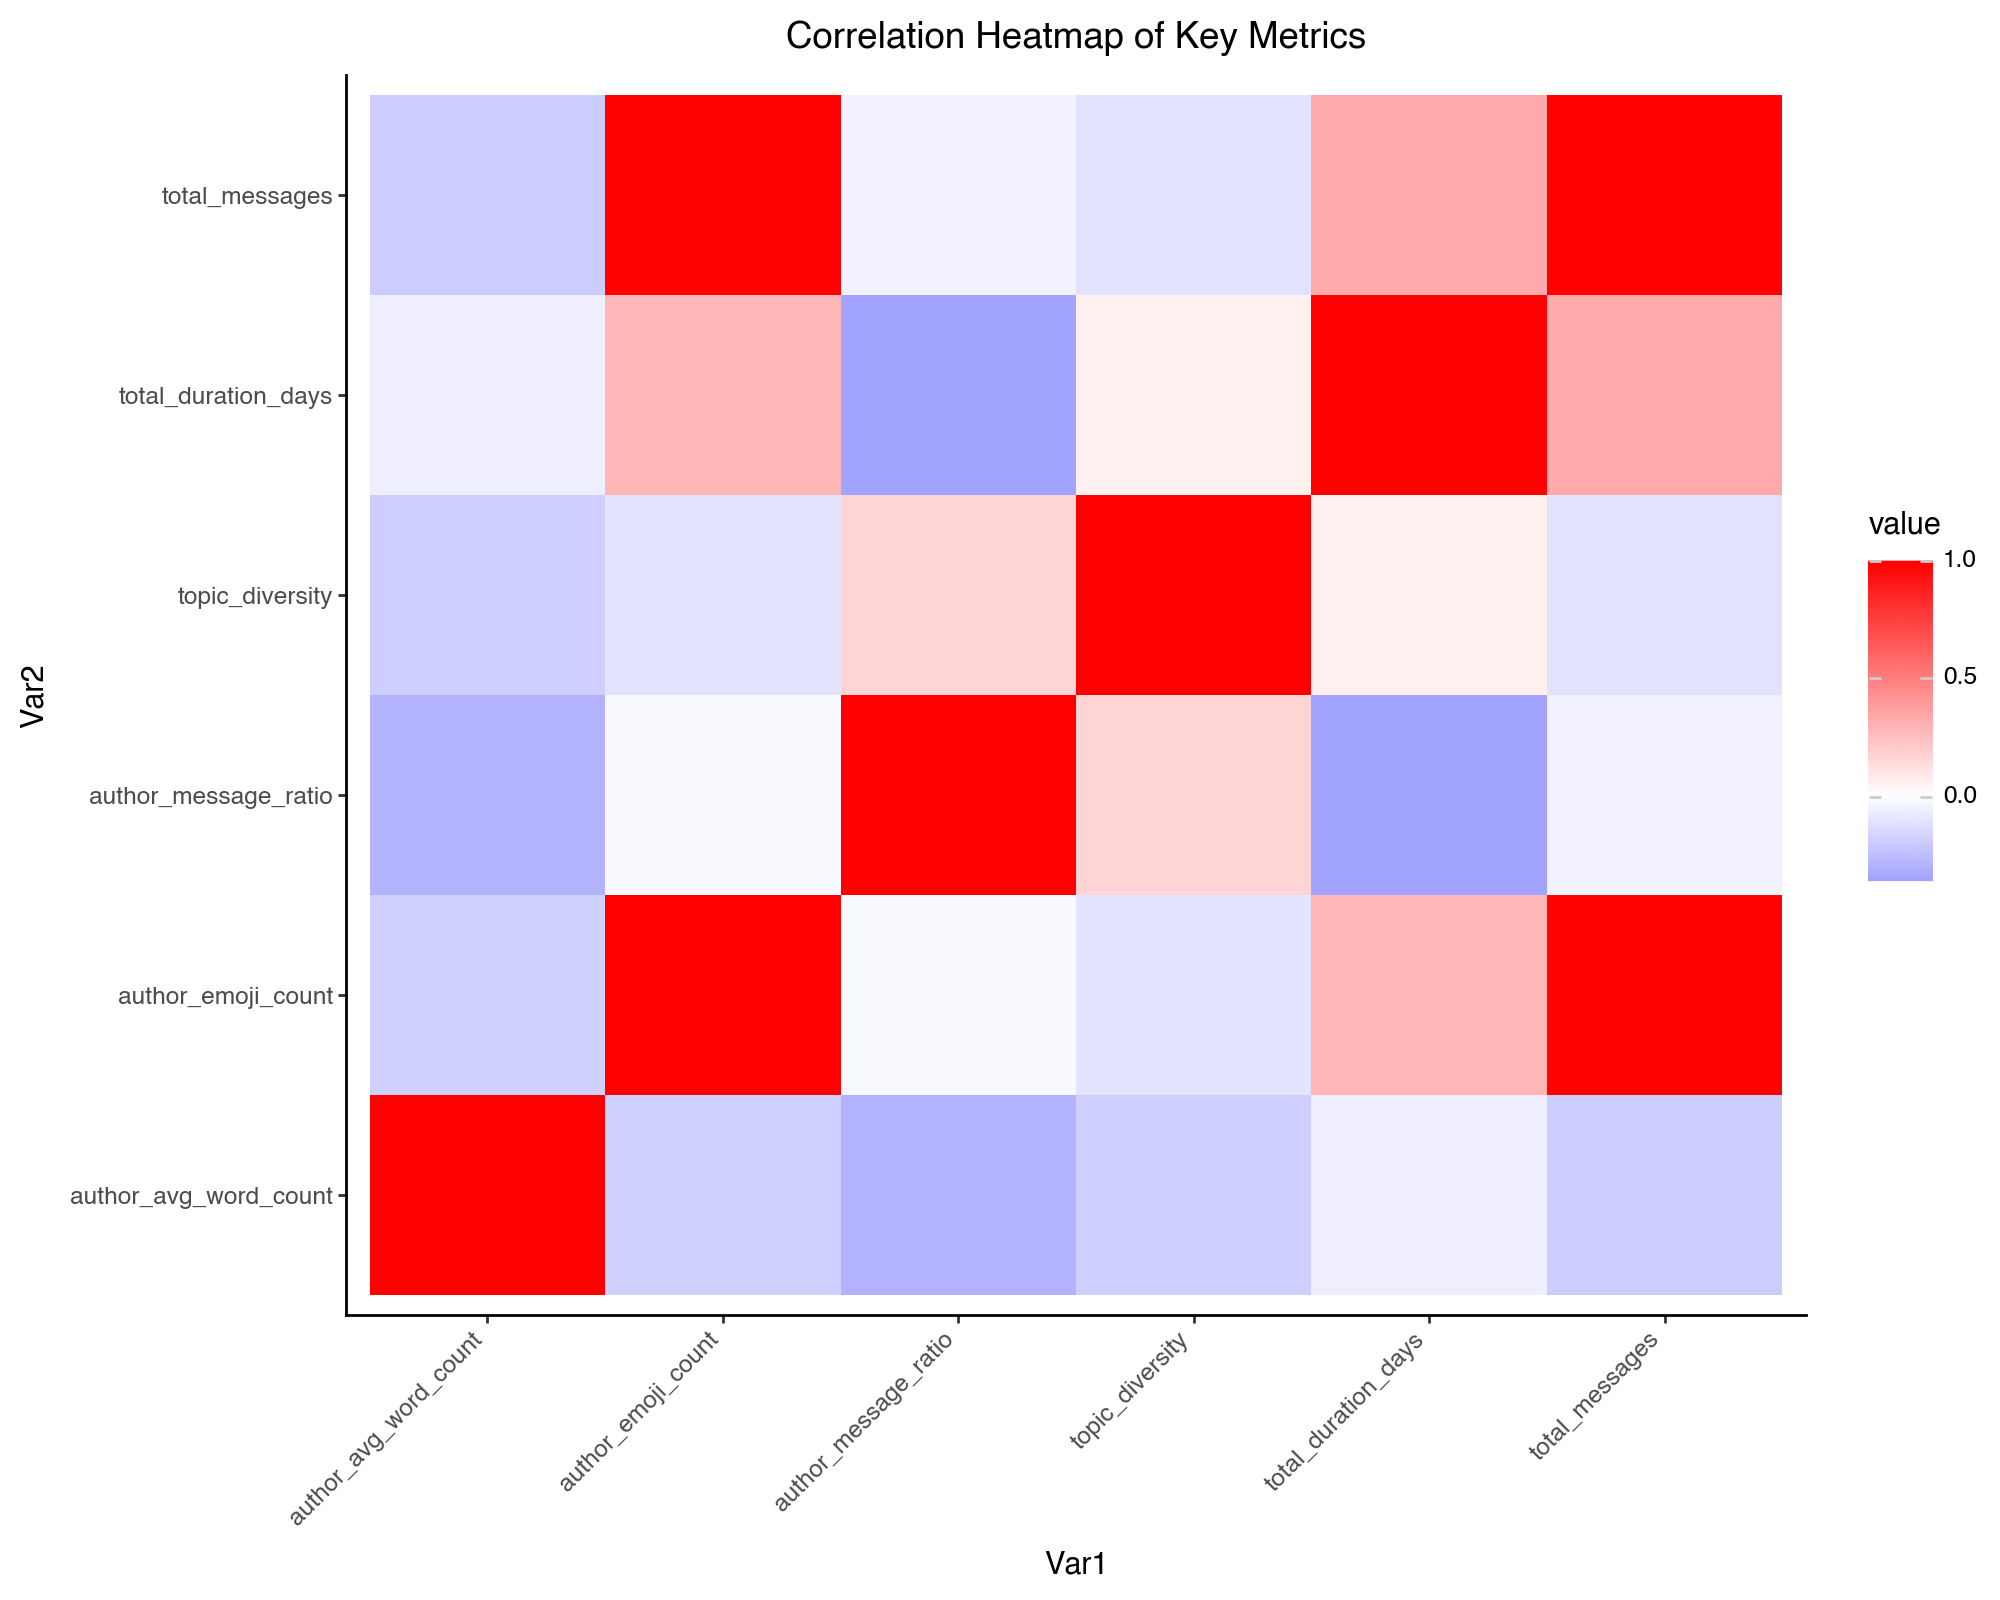

/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_density.py:182: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_density.py:187: PlotnineWarning: Groups with fewer than 2 data points have been removed.
/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_density.py:182: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_density.py:187: PlotnineWarning: Groups with fewer than 2 data points have been removed.


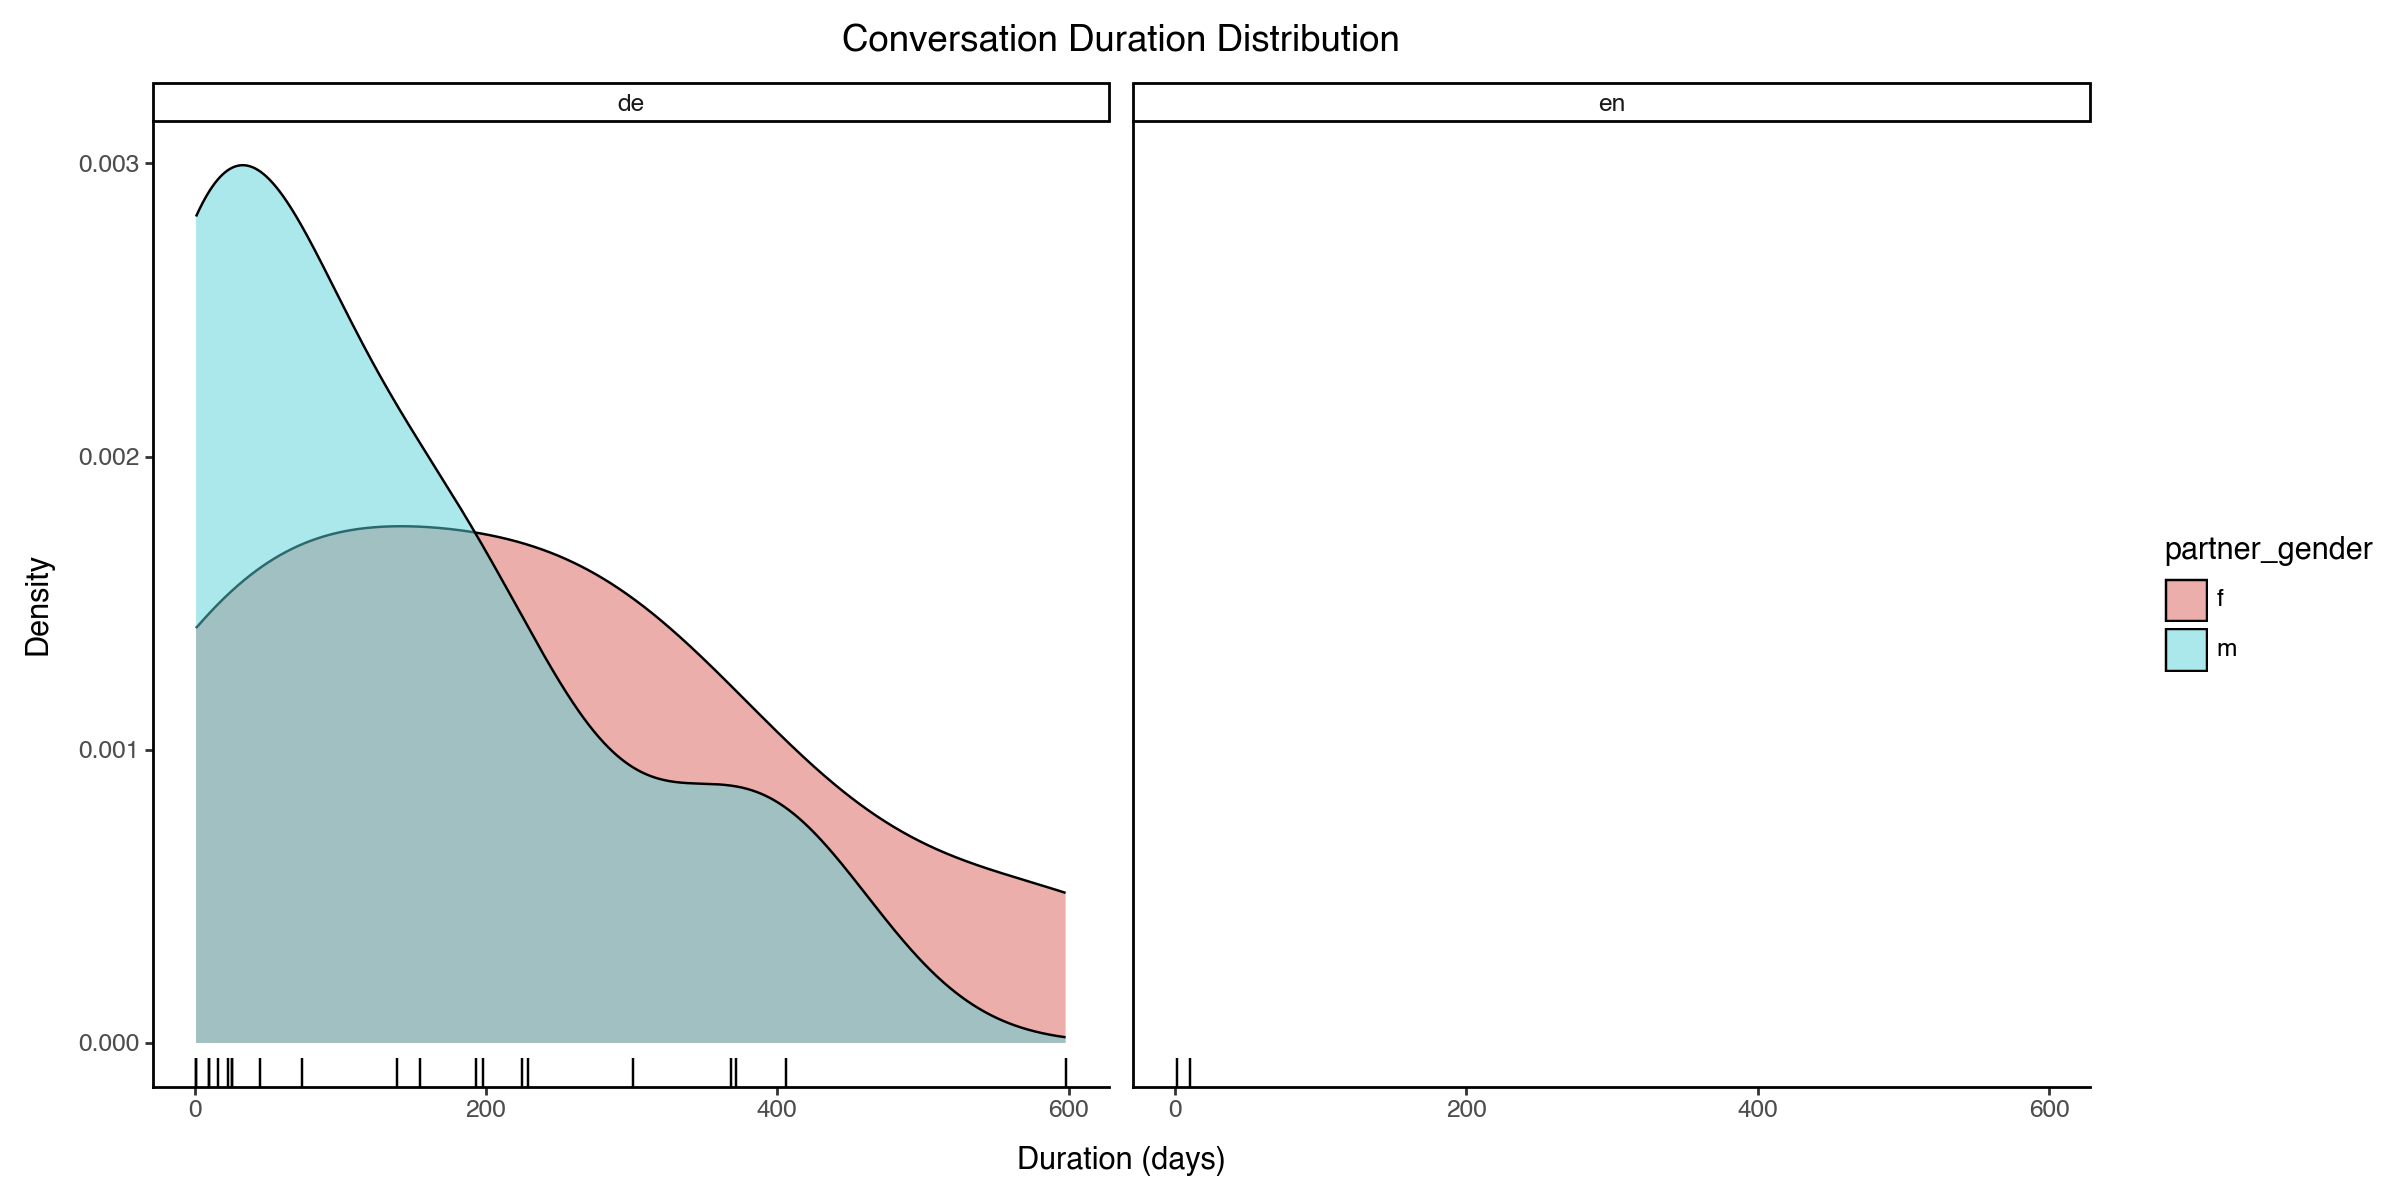

/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_density.py:182: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_density.py:187: PlotnineWarning: Groups with fewer than 2 data points have been removed.
/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_density.py:182: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_density.py:187: PlotnineWarning: Groups with fewer than 2 data points have been removed.
/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_pointrange : Removed 2 rows containing missing values.


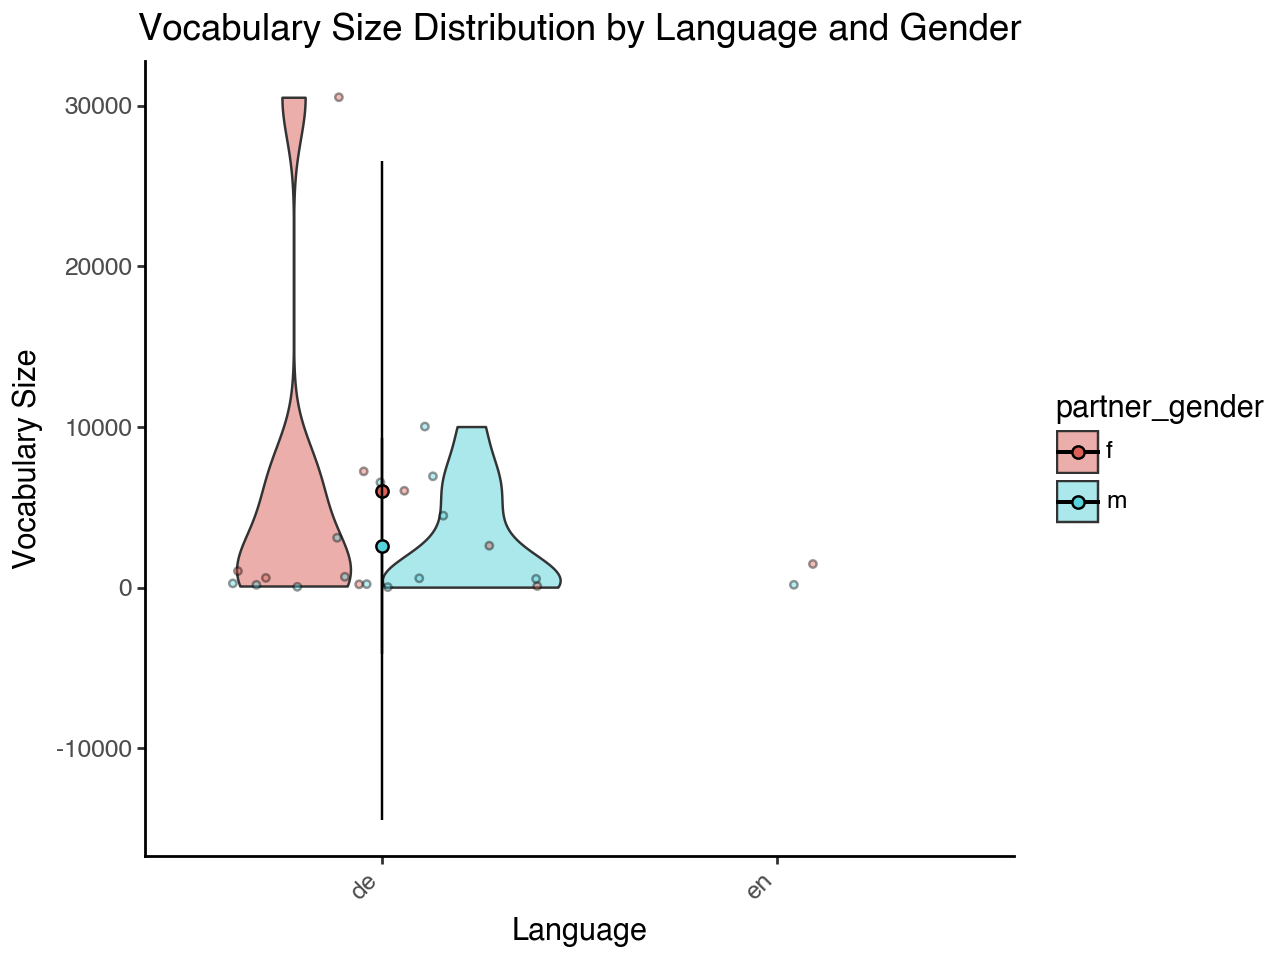

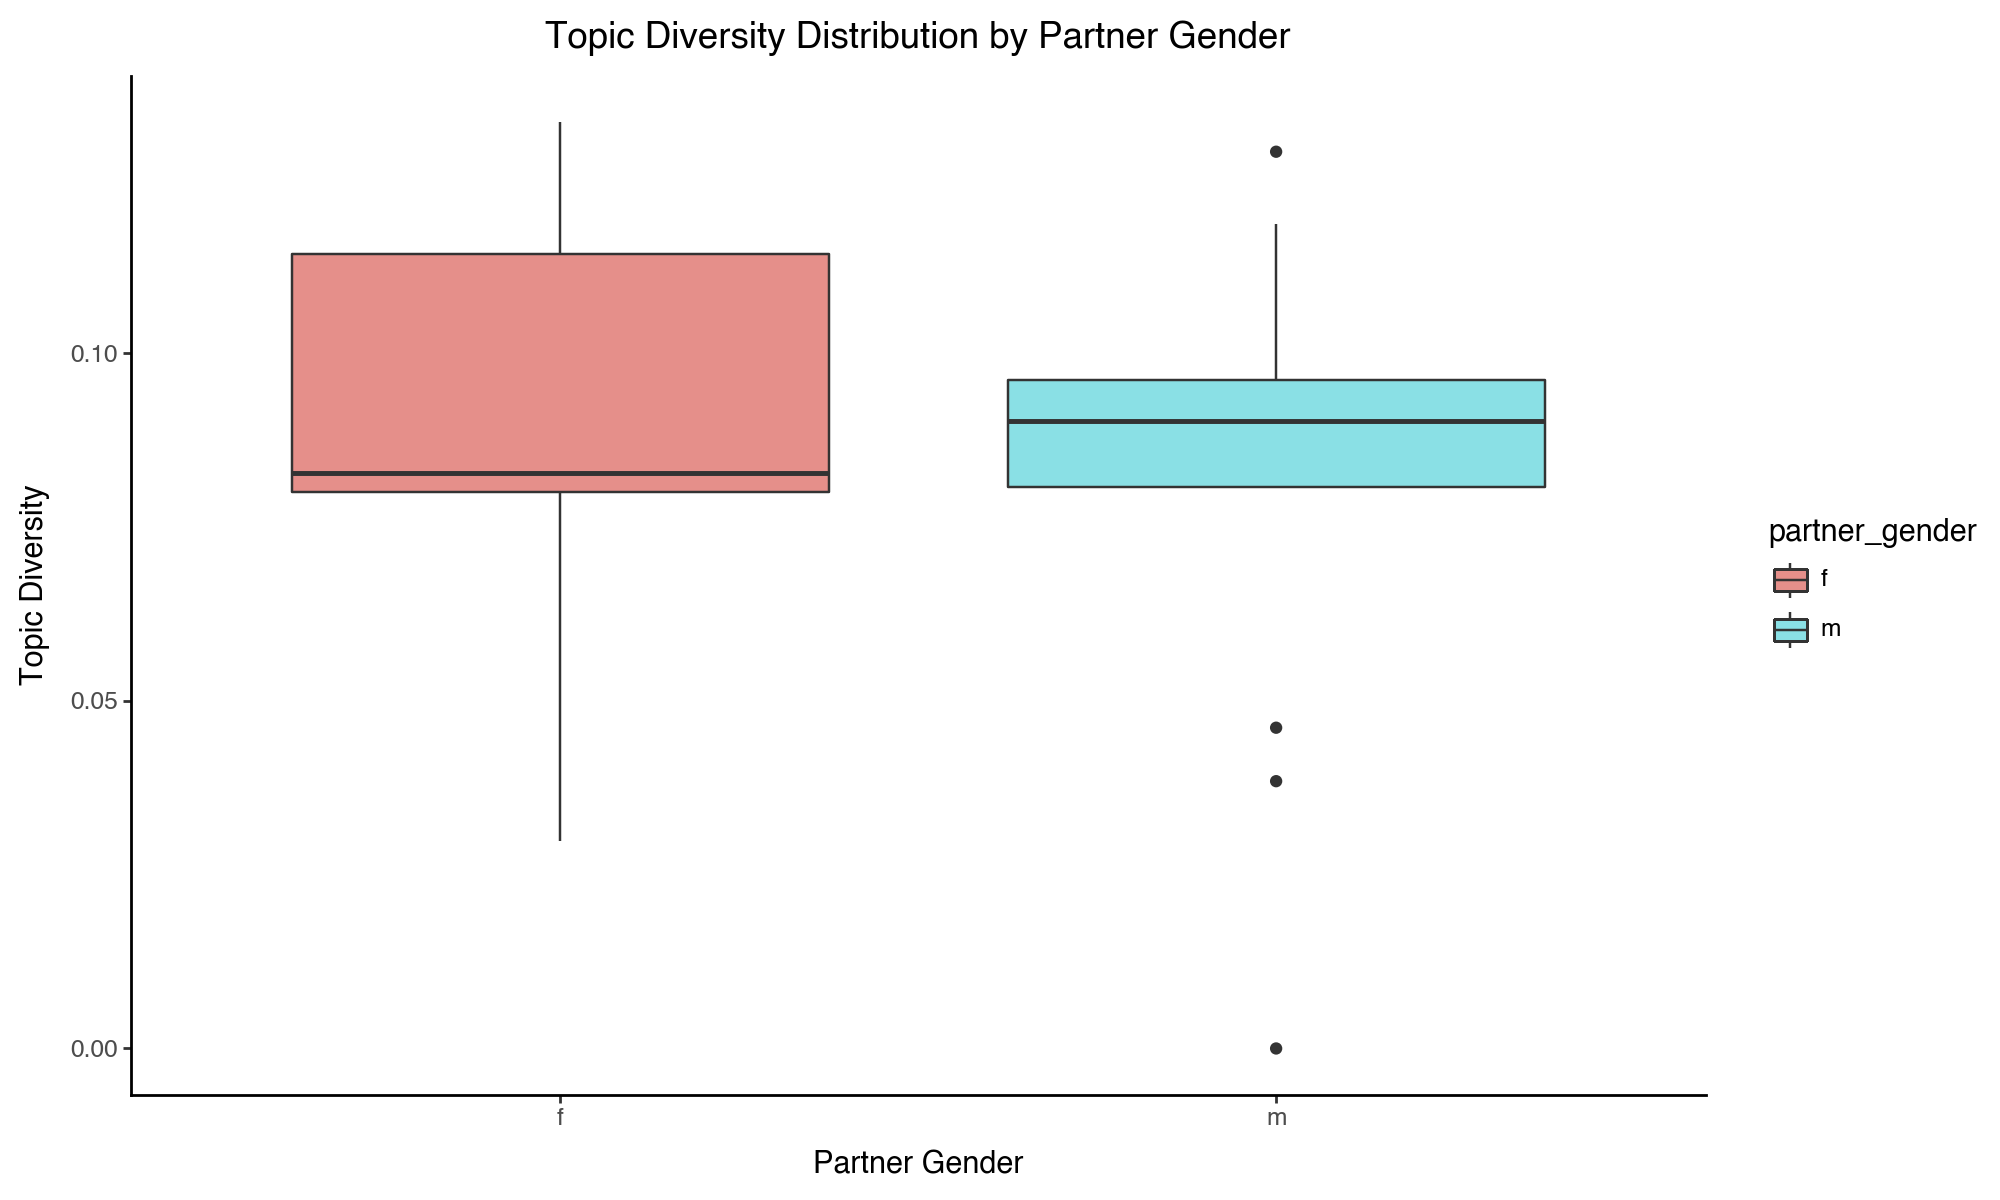

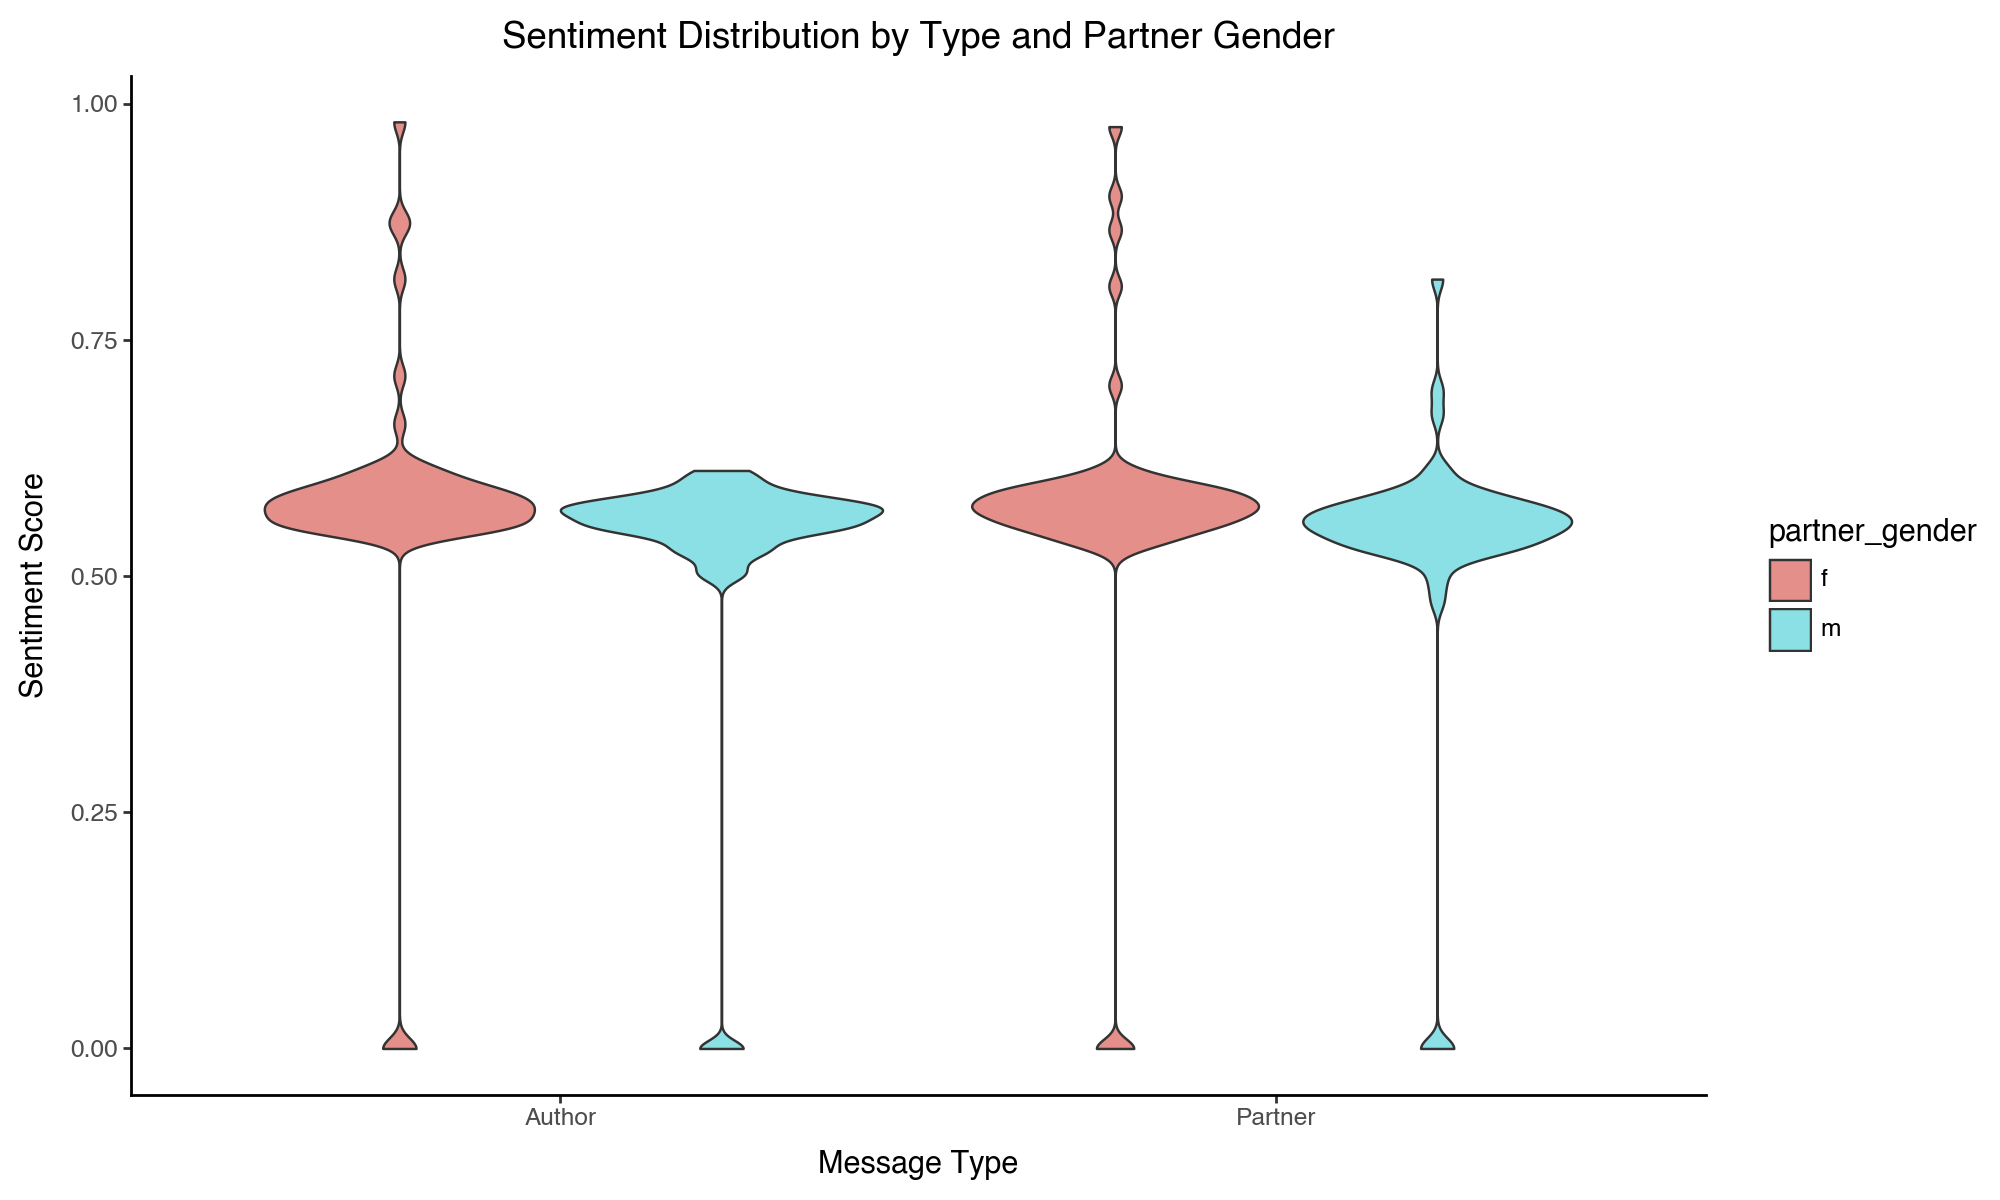

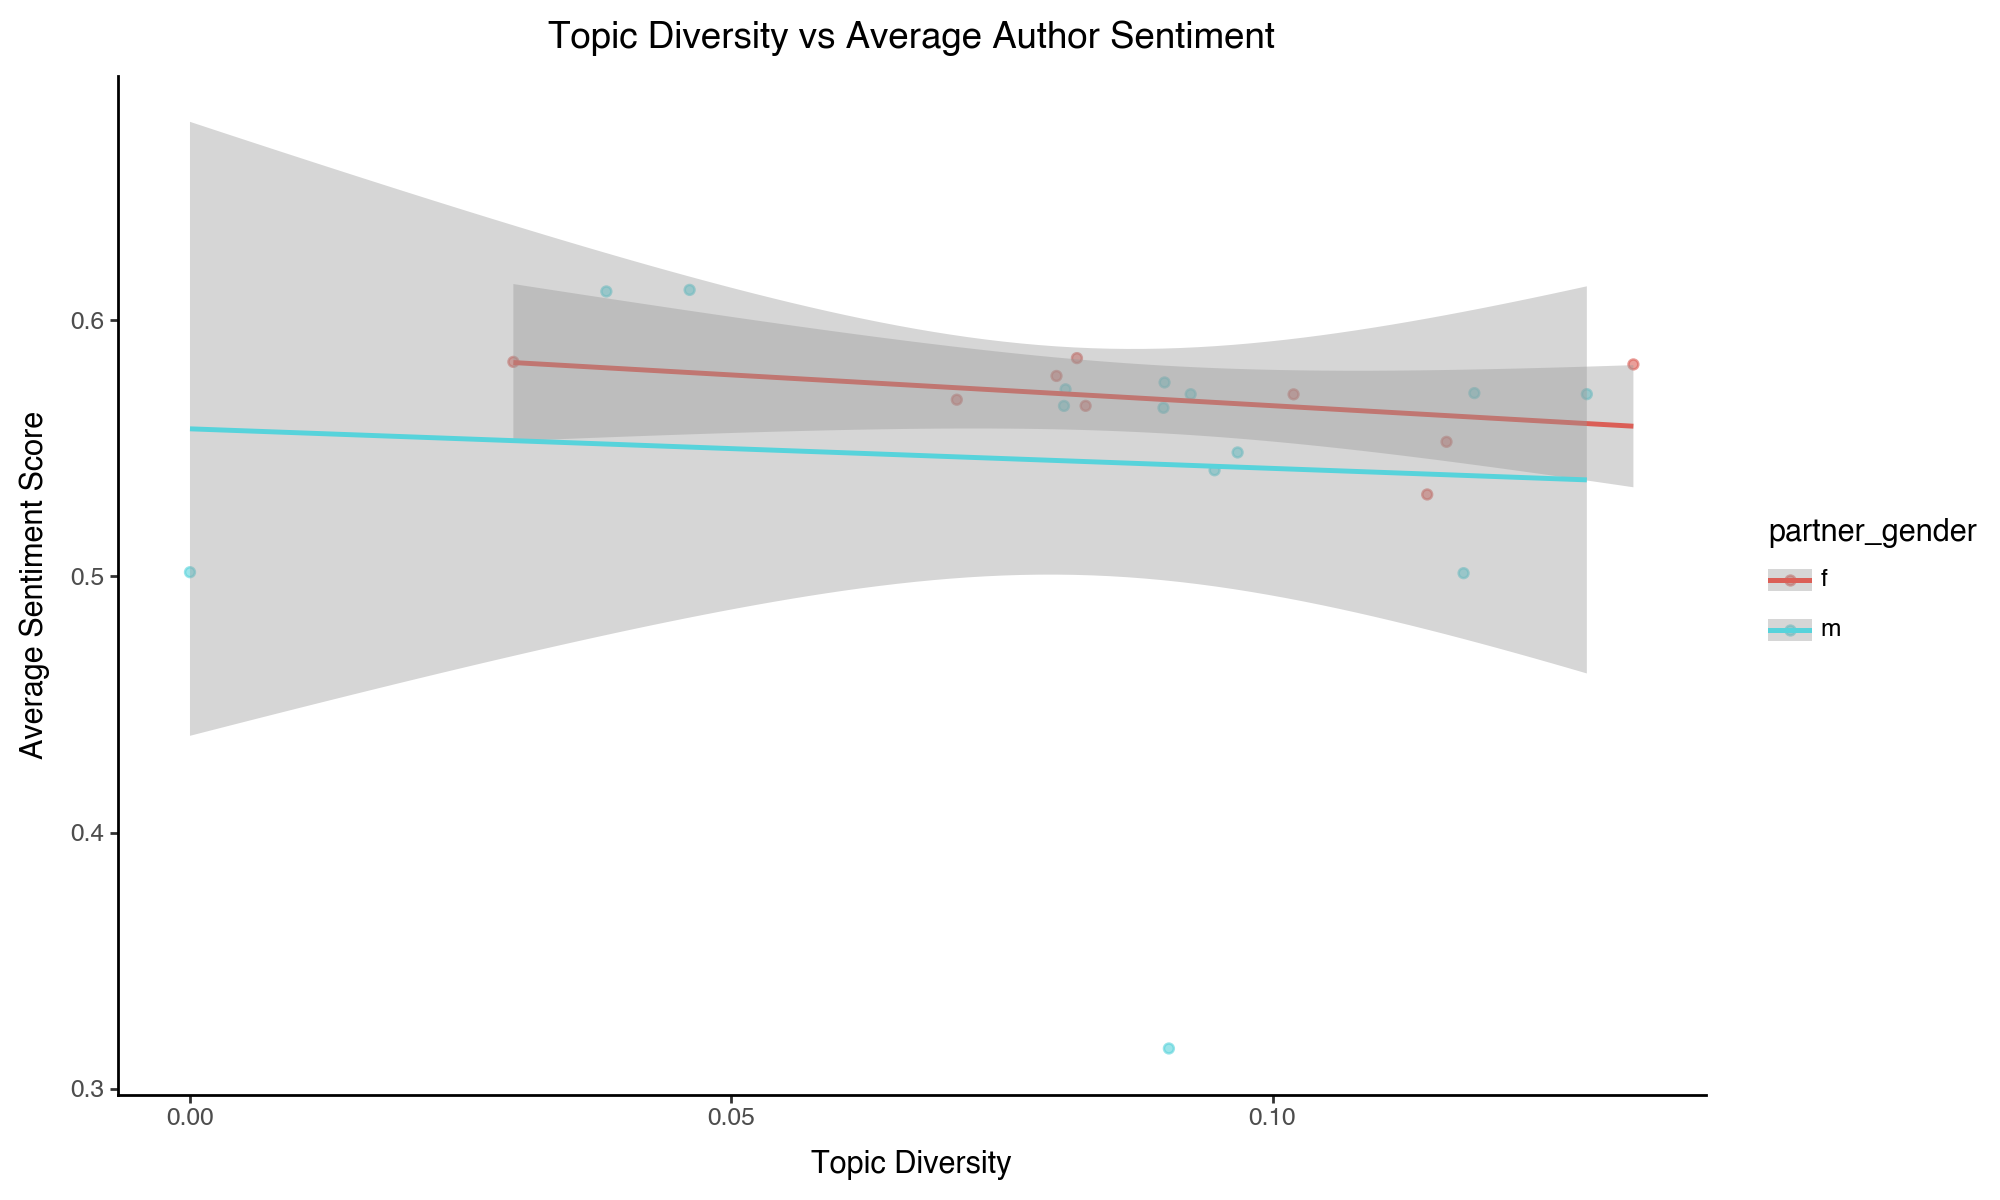

In [102]:
import pandas as pd
from plotnine import *
import ast

# time talking vs. total messages sent
(ggplot(df, aes(x="total_messages", y="total_duration_days"))
    + geom_point(aes(size="topic_diversity", color="conversation_language"), alpha=0.7)
    + geom_smooth(method="lm", color="blue")
    + scale_x_log10(labels=lambda l: [f"{int(v):,}" for v in l])
    + labs(title="Conversation Duration vs Message Count", x="Total Messages (log scale)", y="Duration (days)")
    + theme_classic()
).show()

# gender vs. message ratio
(ggplot(df)
    + geom_boxplot(aes(x='partner_gender', y='author_message_ratio', fill='partner_gender'))
    + labs(title='Message Ratio Distribution by Partner Gender', x='Partner Gender', y='Author Message Ratio')
    + theme_classic()
).show()

# response time vs. total messages sent
(ggplot(df)
    + geom_point(aes(x='total_messages', y='author_response_time_s', color='partner_gender'))
    + geom_smooth(aes(x='total_messages', y='author_response_time_s'))
    + scale_y_log10()
    + labs(title='Response Time vs Total Messages', x='Total Messages', y='Response Time (log scale)')
    + theme_classic()
).show()

(ggplot(df)
    + geom_bar(aes(x='partner_gender', y='author_conversation_initiations', fill='partner_gender'), stat='identity', position='dodge')
    + labs(title='Conversation Initiations by Partner Gender', x='Partner Gender', y='Number of Initiations')
    + theme_classic()
).show()

activity_data = pd.melt(df, id_vars=['conversation_language'],
                       value_vars=['author_avg_active_time', 'partner_avg_active'],
                       var_name='person', value_name='active_time')
(ggplot(activity_data, aes(x='active_time', fill='person')) +
    geom_density(alpha=0.5) +
    facet_wrap('~conversation_language') +
    theme_classic() +
    labs(title='Activity Time Distribution',x='Average Active Time (hours)',  y='Density') +
    theme(legend_position='top') +
    theme_classic()
).show()

# response time
(ggplot(df) + geom_boxplot(aes(x='partner_gender', y='author_response_time_s', fill='partner_gender')) +
    facet_wrap('conversation_language') +
    scale_y_log10() +
    theme_classic() +
    labs(title="Response Time Distribution by Gender and Language", y="Response Time (log scale)", x="Partner Gender") +
    theme(axis_text_x=element_text(angle=45))).show()

(ggplot(df, aes(x='partner_gender', y='author_response_time_s', fill='conversation_language')) +
    geom_violin(scale='width') +
    geom_boxplot(width=0.2, fill='white', alpha=0.5) +
    scale_y_log10() +
    labs(x='Partner Gender', y='Response Time (log seconds)', title='Response Time Distribution') +
    theme_classic() +
    coord_flip()).show()

numeric_cols = ['topic_diversity', 'total_messages', 'author_message_ratio', 'author_avg_word_count', 'author_emoji_count', 'total_duration_days']
corr_data = df[numeric_cols].corr().reset_index().melt('index')
corr_data.columns = ['Var1', 'Var2', 'value']
(ggplot(corr_data, aes('Var1', 'Var2', fill='value')) +
    geom_tile() +
    scale_fill_gradient2(low="blue", mid="white", high="red", midpoint=0) +
    theme_classic() +
    theme(axis_text_x=element_text(angle=45, hjust=1), figure_size=(10, 8)) +
    labs(title="Correlation Heatmap of Key Metrics")).show()

(ggplot(df, aes(x='total_duration_days')) +
    geom_density(aes(fill='partner_gender'), alpha=0.5) +
    geom_rug() +
    facet_wrap('conversation_language') +
    theme_classic() +
    labs(title="Conversation Duration Distribution", x="Duration (days)", y="Density") +
    theme(figure_size=(12, 6))).show()

(ggplot(df, aes(x='conversation_language', y='author_vocabulary_size', fill='partner_gender')) +
         geom_violin(alpha=0.5) +
         geom_jitter(alpha=0.4, size=1) +
         stat_summary(fun_data='mean_sdl', geom='pointrange', color='black') +
         theme_classic() +
         labs(title="Vocabulary Size Distribution by Language and Gender", x="Language", y="Vocabulary Size") +
         theme(axis_text_x=element_text(angle=45, hjust=1))).show()

# Assuming your dataframe is called 'df'
# topic diversity
p1 = (ggplot(df, aes(x='partner_gender', y='topic_diversity', fill='partner_gender')) +
      geom_boxplot(alpha=0.7) +
      theme_classic() +
      labs(title='Topic Diversity Distribution by Partner Gender',
           x='Partner Gender',
           y='Topic Diversity') +
      theme(figure_size=(10, 6)))
p1.show()

# sentiment
df['author_sentiments'] = df['author_monthly_sentiments'].apply(ast.literal_eval)
df['partner_sentiments'] = df['partner_monthly_sentiments'].apply(ast.literal_eval)
sentiment_data = []
for idx, row in df.iterrows():
    for month_sent in row['author_sentiments']:
        sentiment_data.append({
            'partner_gender': row['partner_gender'],
            'sentiment': month_sent,
            'type': 'Author'
        })
    for month_sent in row['partner_sentiments']:
        sentiment_data.append({
            'partner_gender': row['partner_gender'],
            'sentiment': month_sent,
            'type': 'Partner'
        })
sentiment_df = pd.DataFrame(sentiment_data)
p2 = (ggplot(sentiment_df, aes(x='type', y='sentiment', fill='partner_gender')) +
      geom_violin(alpha=0.7) +
      theme_classic() +
      labs(title='Sentiment Distribution by Type and Partner Gender',
           x='Message Type',
           y='Sentiment Score') +
      theme(figure_size=(10, 6)))
df['avg_author_sentiment'] = df['author_monthly_sentiments'].apply(lambda x: sum(ast.literal_eval(x))/len(ast.literal_eval(x)))
p3 = (ggplot(df, aes(x='topic_diversity', y='avg_author_sentiment', color='partner_gender')) +
      geom_point(alpha=0.6) +
      geom_smooth(method='lm') +
      theme_classic() +
      labs(title='Topic Diversity vs Average Author Sentiment',
           x='Topic Diversity',
           y='Average Sentiment Score') +
      theme(figure_size=(10, 6)))
p2.show()
p3.show()

# Embedding visualization

/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_ellipse.py:65: PlotnineWarning: Too few points to calculate an ellipse


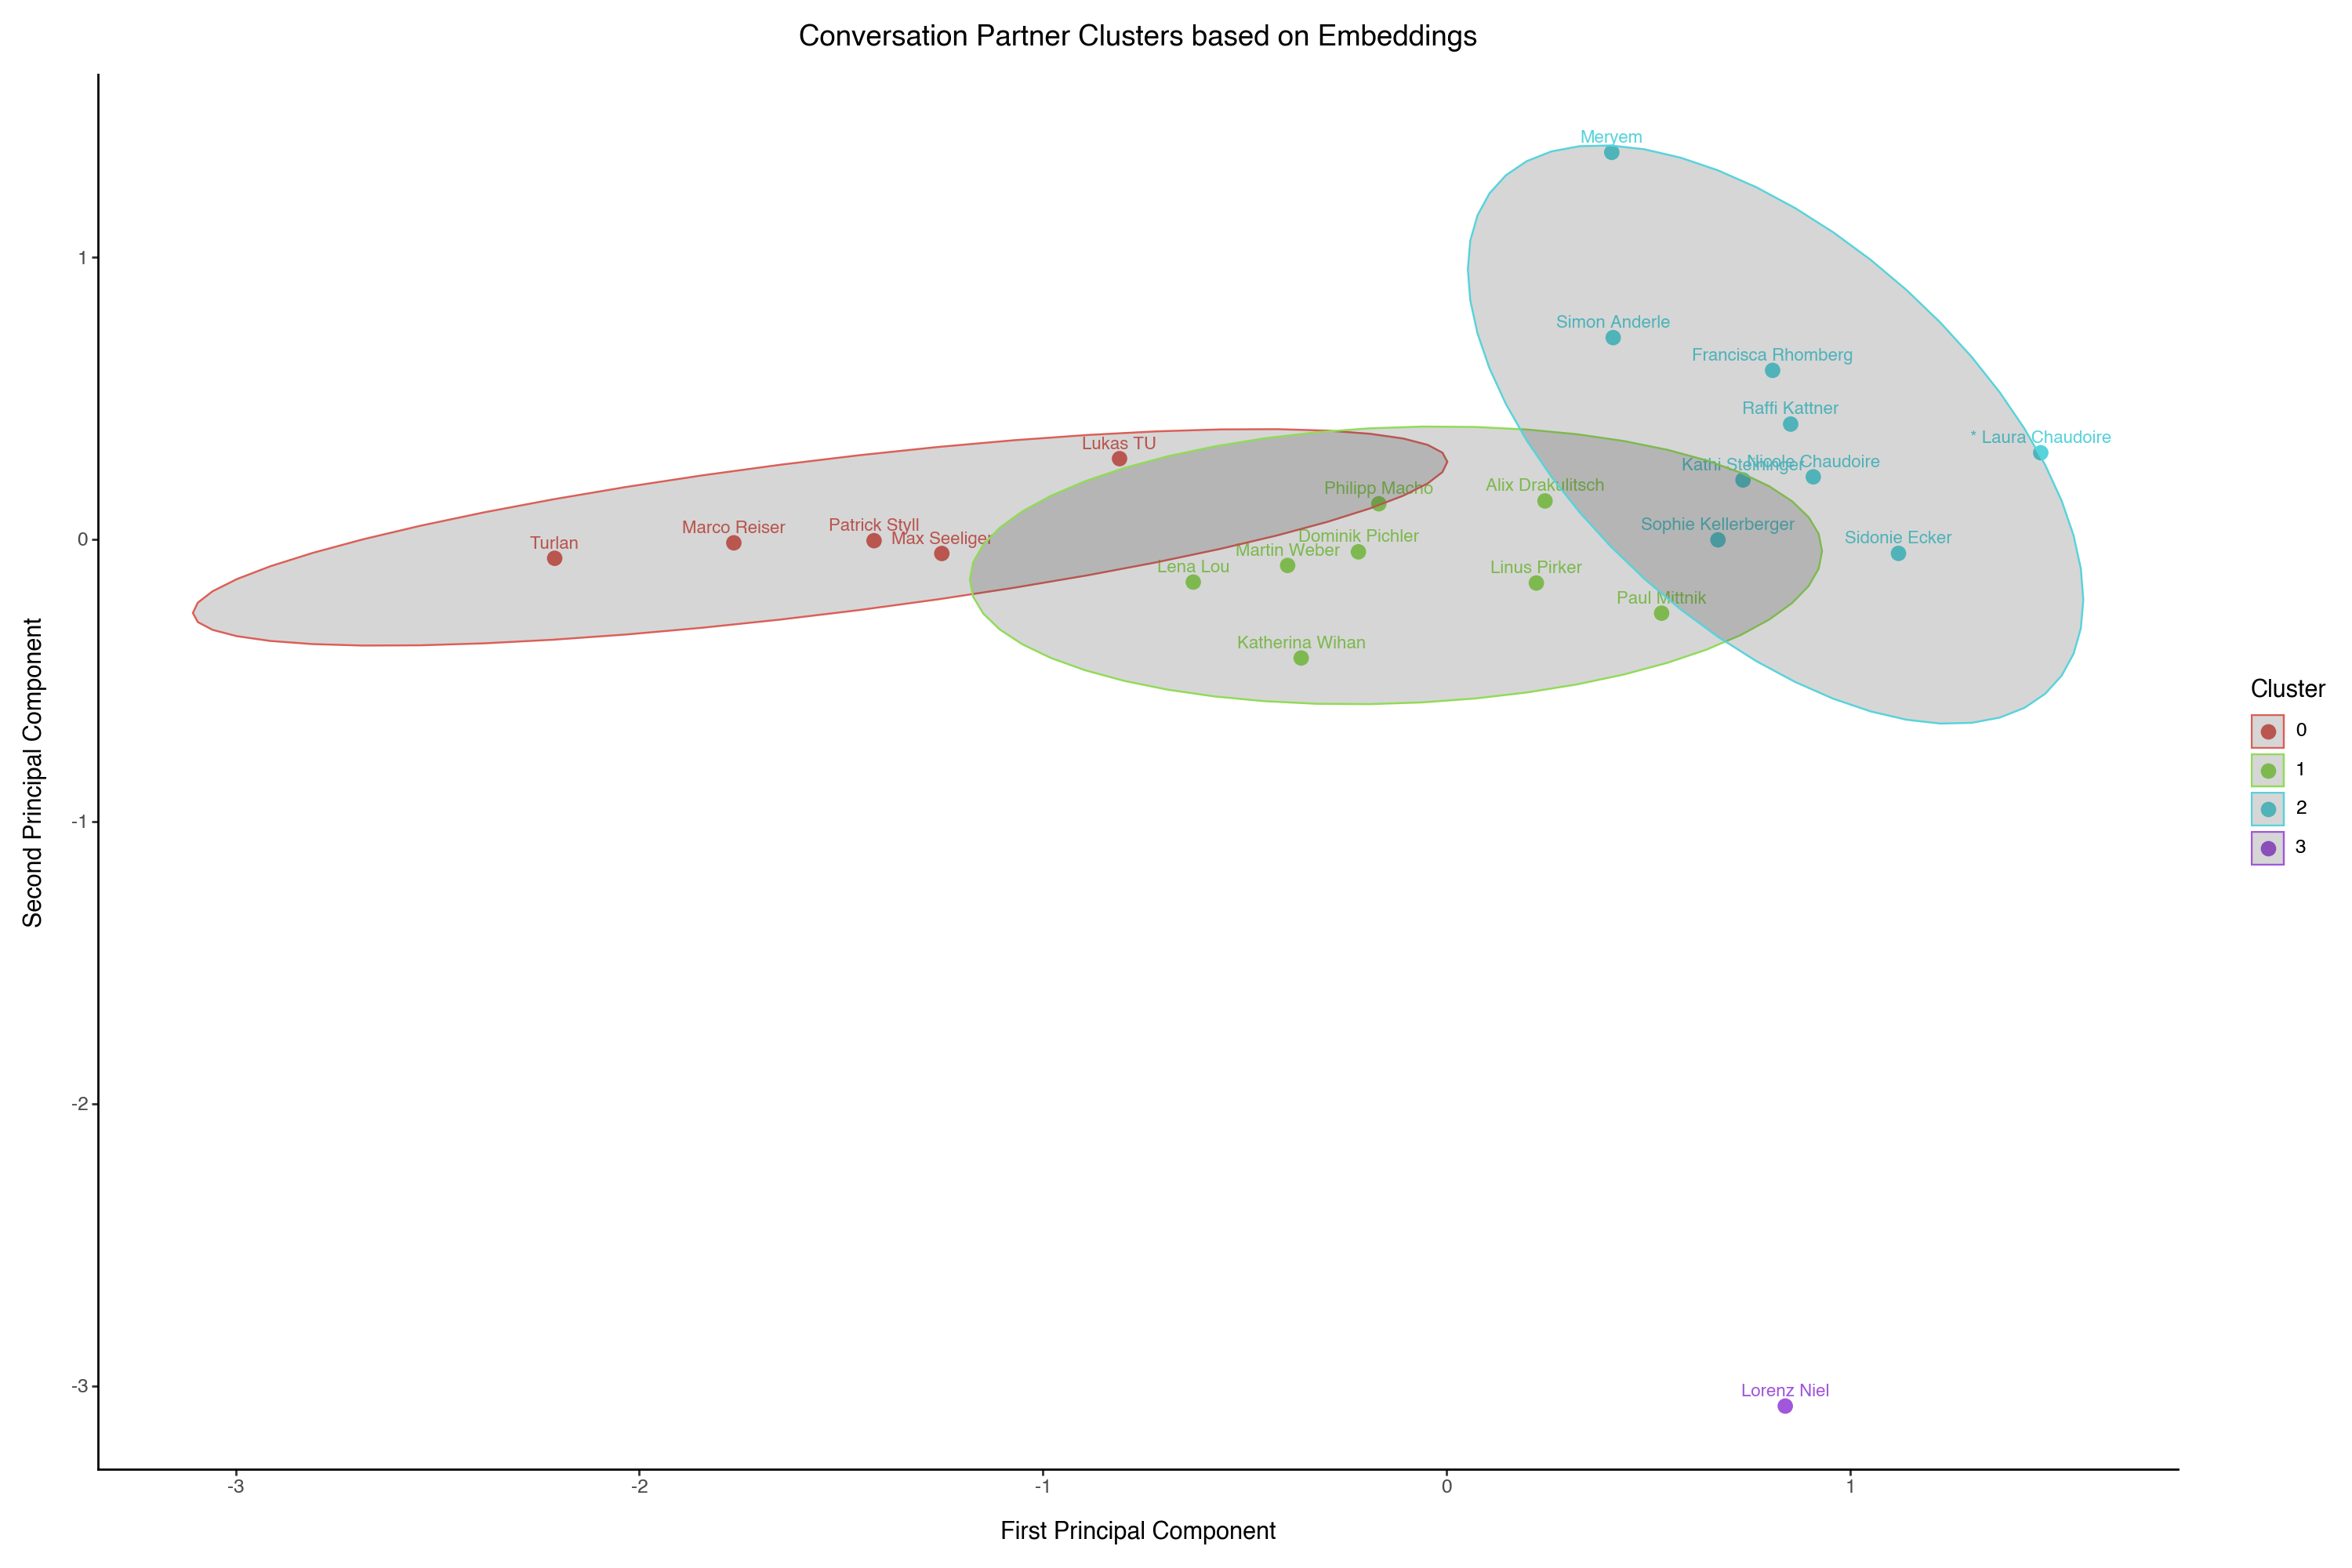

In [95]:
from plotnine import *
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import ast

df['embeddings_array'] = df['embeddings'].apply(ast.literal_eval)
embeddings_array = np.vstack(df['embeddings_array'].values)

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_array)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_2d)

plot_df = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'partner_name': df['partner_name'],
    'cluster': clusters
})

p = (ggplot(plot_df, aes(x='x', y='y', color='factor(cluster)'))
    + geom_point(size=3)
    + geom_text(aes(label='partner_name'), size=8, nudge_y=0.05)
    + stat_ellipse(geom='polygon', alpha=0.2, level=0.95)
    + theme_classic()
    + labs(title='Conversation Partner Clusters based on Embeddings', x='First Principal Component', y='Second Principal Component', color='Cluster')
    + theme(figure_size=(15, 10))
)
p.show()

/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/plotnine/stats/stat_ellipse.py:65: PlotnineWarning: Too few points to calculate an ellipse


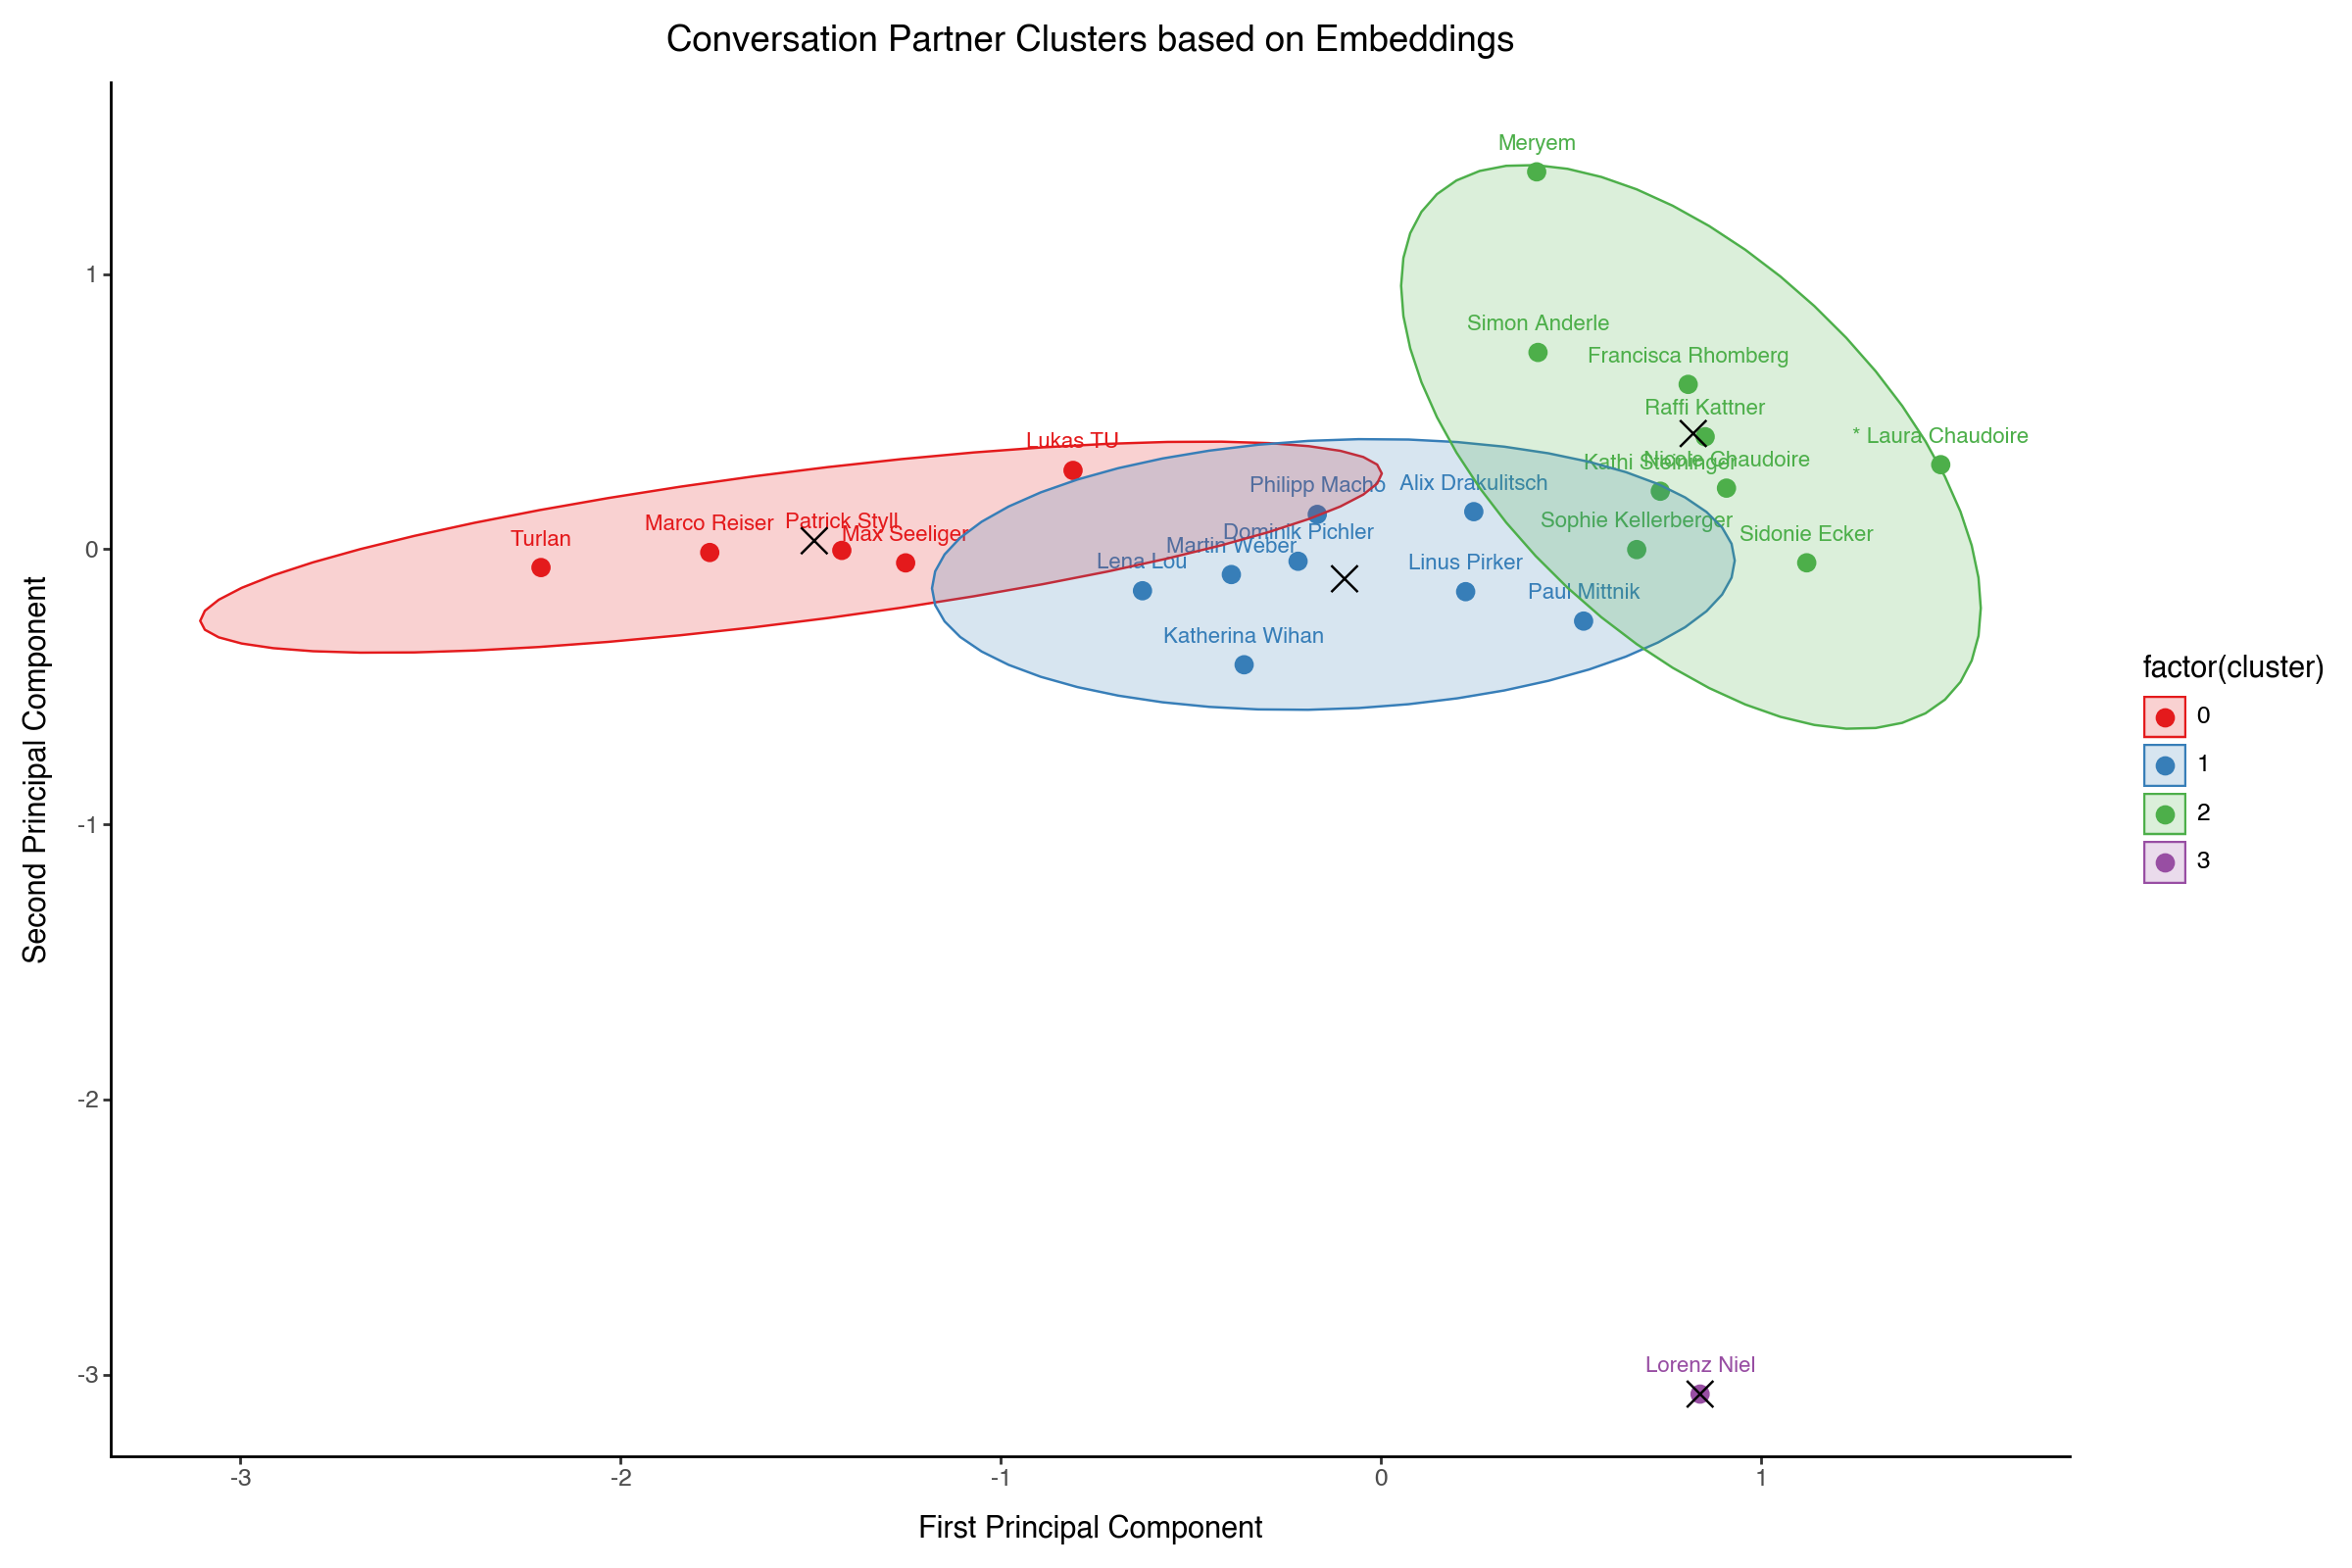

In [96]:
from plotnine import *
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import ast

df['embeddings_array'] = df['embeddings'].apply(ast.literal_eval)
embeddings_array = np.vstack(df['embeddings_array'].values)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_array)

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_2d)

plot_df = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'partner_name': df['partner_name'],
    'cluster': clusters
})

centroids = kmeans.cluster_centers_

p = (ggplot(plot_df, aes(x='x', y='y', color='factor(cluster)'))
    + geom_point(size=3)
    + geom_text(aes(label='partner_name'), size=8, nudge_y=0.1)
    + stat_ellipse(aes(fill='factor(cluster)'), geom='polygon', alpha=0.2)
    + geom_point(data=pd.DataFrame({
        'x': centroids[:, 0],
        'y': centroids[:, 1],
        'cluster': range(n_clusters)
    }), color='black', size=5, shape='x')
    + theme_classic()
    + labs(title='Conversation Partner Clusters based on Embeddings',
           x='First Principal Component',
           y='Second Principal Component')
    + theme(figure_size=(12, 8))
    + scale_color_brewer(type='qual', palette='Set1')
    + scale_fill_brewer(type='qual', palette='Set1'))
p.show()

# matplotlib

/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.


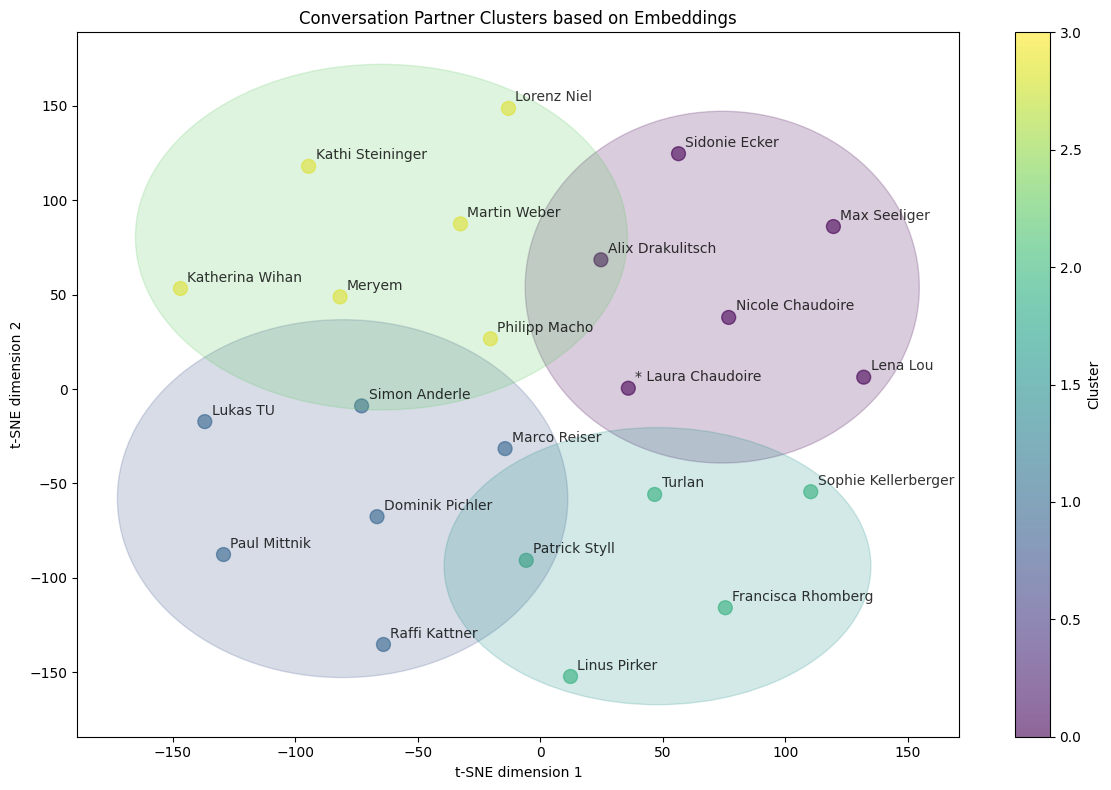

In [97]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import ast

def parse_embedding(embedding_str):
    return np.array(ast.literal_eval(embedding_str))
embeddings = df['embeddings'].apply(parse_embedding).to_list()
embeddings_array = np.array(embeddings)

# calculate appropriate perplexity (should be smaller than n_samples)
n_samples = len(embeddings_array)
perplexity = min(30, n_samples - 1)  # default is 30, but we'll adjust if needed

tsne = TSNE(n_components=2, 
            random_state=42, 
            perplexity=perplexity,
            n_iter=2000)
embeddings_2d = tsne.fit_transform(embeddings_array)

n_clusters = min(4, n_samples)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_2d)

plt.figure(figsize=(12, 8))

scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                     c=clusters, cmap='viridis', 
                     alpha=0.6, s=100)

for i, (x, y) in enumerate(embeddings_2d):
    plt.annotate(df['partner_name'].iloc[i], (x, y), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=10, alpha=0.8)

for i in range(n_clusters):
    cluster_points = embeddings_2d[clusters == i]
    if len(cluster_points) > 0:
        hull = plt.matplotlib.patches.Ellipse(
            xy=cluster_points.mean(axis=0),
            width=cluster_points[:, 0].ptp() * 1.5,
            height=cluster_points[:, 1].ptp() * 1.5,
            alpha=0.2,
            color=plt.cm.viridis(i / n_clusters)
        )
        plt.gca().add_patch(hull)

plt.title('Conversation Partner Clusters based on Embeddings')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.tight_layout()
plt.show()

/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.


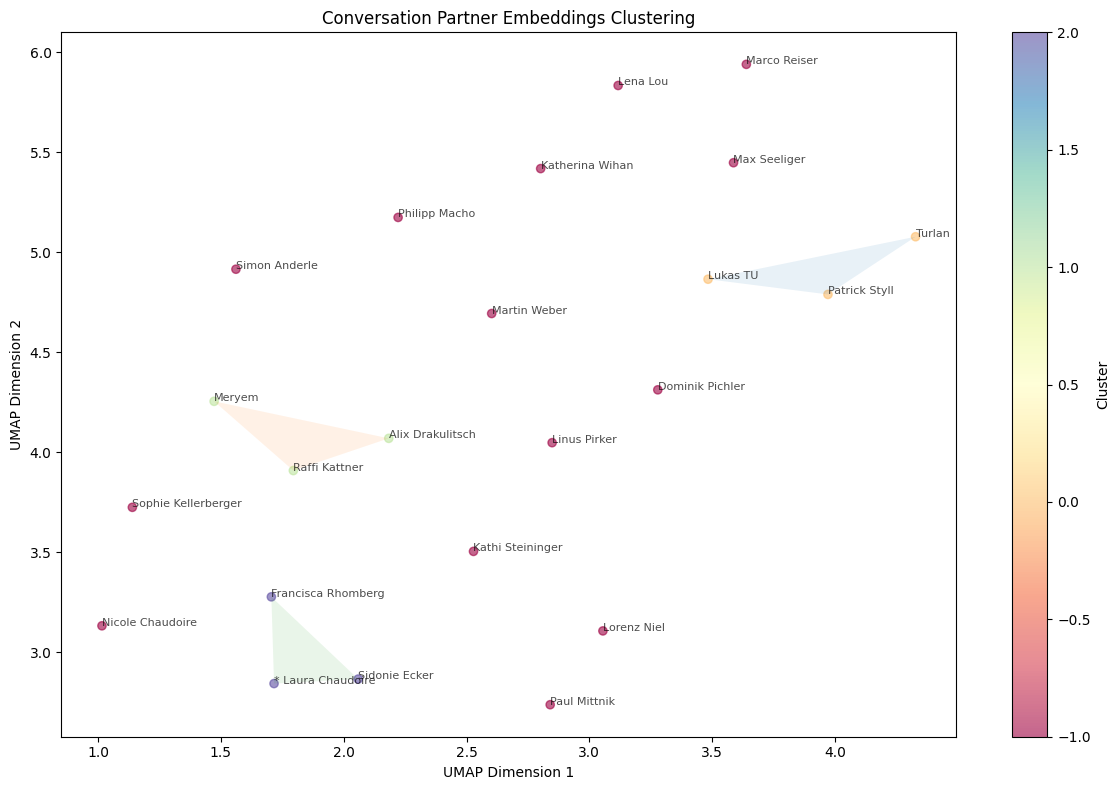

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import ast

def parse_embedding(embedding_str):
    return np.array(ast.literal_eval(embedding_str))
embeddings = np.vstack(df['embeddings'].apply(parse_embedding))

# reduce dimensionality with UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = reducer.fit_transform(embeddings)
# perform clustering with DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=3).fit(embeddings_2d)
labels = clustering.labels_

plt.figure(figsize=(12, 8))

scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                     c=labels, cmap='Spectral', alpha=0.6)

for i, txt in enumerate(df['partner_name']):
    plt.annotate(txt, (embeddings_2d[i, 0], embeddings_2d[i, 1]), 
                fontsize=8, alpha=0.7)

from scipy.spatial import ConvexHull
unique_labels = set(labels)
for label in unique_labels:
    if label != -1:  # skip noise points
        mask = labels == label
        points = embeddings_2d[mask]
        if len(points) >= 3:  # need at least 3 points for ConvexHull
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]
            plt.fill(hull_points[:, 0], hull_points[:, 1], alpha=0.1)

plt.colorbar(scatter, label='Cluster')
plt.title('Conversation Partner Embeddings Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.tight_layout()
plt.show()

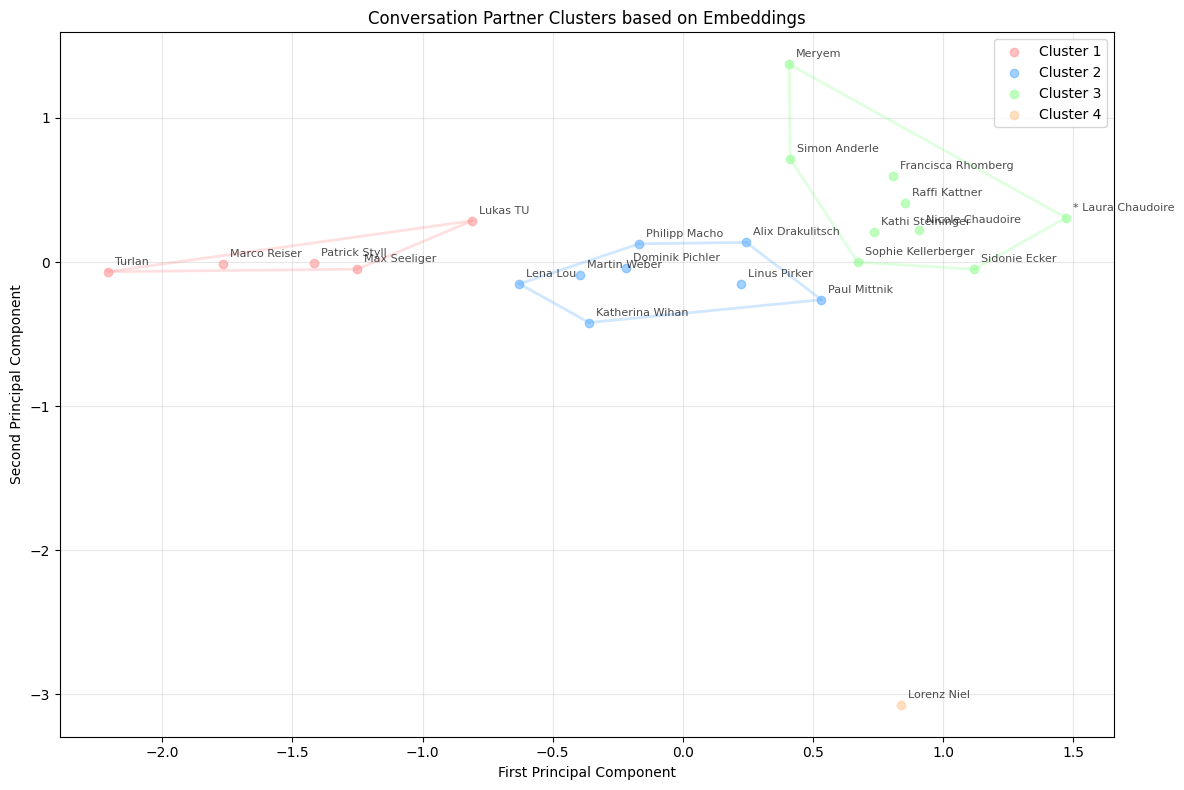

In [99]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull


def process_embedding_string(embedding_str):
    return np.array(eval(embedding_str))
embeddings = df['embeddings'].apply(process_embedding_string)
embeddings_array = np.stack(embeddings)

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_array)

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_2d)

plt.figure(figsize=(12, 8))

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
for i in range(n_clusters):
    mask = clusters == i
    plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], 
                c=colors[i], label=f'Cluster {i+1}', alpha=0.6)
    if np.sum(mask) >= 3:
        points = embeddings_2d[mask]
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 
                    c=colors[i], alpha=0.3, linewidth=2)

for i, (x, y) in enumerate(embeddings_2d):
    plt.annotate(df['partner_name'].iloc[i], (x, y), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.7)

plt.title('Conversation Partner Clusters based on Embeddings')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# vega altair

In [ ]:
clustering circles for the clustering plot.

Index(['conversation_language', 'partner_name', 'author_monthly_sentiments',
       'partner_monthly_sentiments', 'partner_gender', 'topic_diversity',
       'total_messages', 'author_message_ratio', 'partner_message_ratio',
       'author_avg_word_count', 'partner_avg_word_count', 'author_media_count',
       'partner_media_count', 'author_emoji_count', 'partner_emoji_count',
       'author_url_count', 'partner_url_count', 'author_vocabulary_size',
       'partner_vocabulary_size', 'total_conversations', 'total_duration_days',
       'author_message_freq_s', 'partner_message_freq_s',
       'author_response_time_s', 'partner_response_time_s',
       'author_avg_active_time', 'partner_avg_active',
       'author_conversation_initiations', 'partner_conversation_initiations',
       'embeddings'],
      dtype='object')
conversation_language                object
partner_name                         object
author_monthly_sentiments            object
partner_monthly_sentiments           object
partner_gender                       object
topic_diversity                     float64
total_messages                        int64
author_message_ratio                float64
partner_message_ratio               float64
author_avg_word_count               float64
partner_avg_word_count              float64
author_media_count                    int64
partner_media_count                   int64
author_emoji_count                    int64
partner_emoji_count                   int64
author_url_count                      int64
partner_url_count                     int64
author_vocabulary_size                int64
partner_vocabulary_size               int64
total_conversations                   int64
total_duration_days                   int64
author_message_freq_s               float64
partner_message_freq_s              float64
author_response_time_s              float64
partner_response_time_s             float64
author_avg_active_time              float64
partner_avg_active                  float64
author_conversation_initiations       int64
partner_conversation_initiations      int64
embeddings                           object
dtype: object


In [131]:
import altair as alt
import pandas as pd
import numpy as np
from umap import UMAP
import ast

gender_colors = alt.Scale(
    domain=['m', 'f'],
    range=['#4e79a7', '#f28bb3']
)


def process_embeddings(df):
    embeddings_array = np.array([ast.literal_eval(emb) for emb in df['embeddings']])
    
    umap = UMAP(n_components=2, random_state=42)
    embeddings_2d = umap.fit_transform(embeddings_array)

    df['umap_x'] = embeddings_2d[:, 0]
    df['umap_y'] = embeddings_2d[:, 1]
    return df

df = process_embeddings(df)


brush = alt.selection_interval(encodings=['x', 'y'])


scatter = alt.Chart(df).mark_circle().encode(
    x=alt.X('author_message_ratio:Q', 
            title='Author Message Ratio',
            scale=alt.Scale(domain=[0, 1])),
    y=alt.Y('total_messages:Q', 
            title='Total Messages',
            scale=alt.Scale(type='log')),
    color=alt.condition(
        brush, 
        'partner_gender:N',
        alt.value('lightgray'),
        scale=gender_colors,
        title='Partner Gender'
    ),
    tooltip=['partner_name', 
            alt.Tooltip('author_message_ratio:Q', format='.2%'),
            'total_messages', 
            alt.Tooltip('topic_diversity:Q', format='.3f')]
).properties(
    width=300,
    height=300,
    title='Engagement: Total Quantity and Contribution',
).add_params(brush)


response_scatter = alt.Chart(df).mark_circle().encode(
    x=alt.X('author_response_time_s:Q', 
            scale=alt.Scale(type='log'),
            title='Author Response Time (s)'),
    y=alt.Y('partner_response_time_s:Q',
            scale=alt.Scale(type='log'),
            title='Partner Response Time (s)'),
    color=alt.condition(
        brush, 
        'partner_gender:N',
        alt.value('lightgray'),
        scale=gender_colors,
        title='Partner Gender'
    ),
    tooltip=['partner_name', 
            alt.Tooltip('author_response_time_s:Q', format='.1f'),
            alt.Tooltip('partner_response_time_s:Q', format='.1f'),
            'total_messages']
).properties(
    width=300,
    height=300,
    title='Engagement: Mutual Response Time'
).transform_filter(brush)


latent_scatter = alt.Chart(df).mark_circle().encode(
    x=alt.X('umap_x:Q', title='UMAP Dimension 1'),
    y=alt.Y('umap_y:Q', title='UMAP Dimension 2'),
    color=alt.condition(
        brush, 
        'partner_gender:N',
        alt.value('lightgray'),
        scale=gender_colors,
        title='Partner Gender'
    ),
    # size=alt.Size('total_messages:Q',
    #               scale=alt.Scale(range=[50, 400]),
    #               title='Total Messages'),
    tooltip=['partner_name', 
            'total_messages',
            alt.Tooltip('topic_diversity:Q', format='.3f')]
).properties(
    width=300,
    height=300,
    title='Content: Latent Space Clustering'
).transform_filter(brush)


final_vis = (scatter | response_scatter) & (latent_scatter)

final_vis.configure_axis(
    labelFontSize=12,
    titleFontSize=12,
).configure_title(
    fontSize=14
).configure_legend(
    titleFontSize=12,
    labelFontSize=11
)

/Users/sueszli/dev/whatsapp-lens/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.


alt.VConcatChart(...)